###***HR DATA ANALYSIS***
Activities to complete:
-Data cleansing involves removing unnecessary columns.\
-Giving the columns new names.\
-Eliminating redundant entries.\
-sanitizing specific columns.\
-Eliminate the dataset's NaN values.\
-Look for a few more changes if necessary

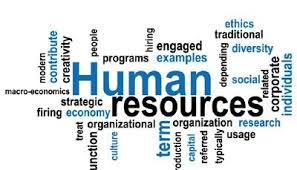

In [133]:
from IPython.display import Image
Image("/content/HR image.jpg")

##Activities that given by AFAME TECHNOLOGIES

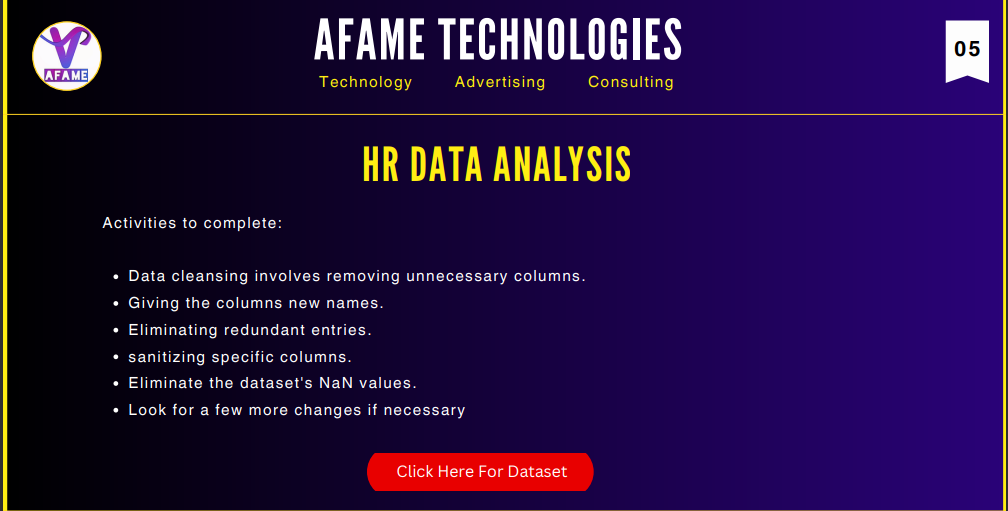

In [167]:
Image("/content/afame_hr_data.png")

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

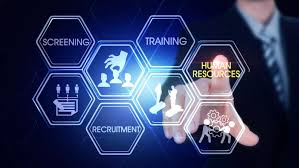

In [135]:
Image("/content/hr image1.png")

##LOAD DATASET OF HR DATA

In [136]:
df=pd.read_csv('/content/HR Data.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [137]:
#shape of dataset
df.shape

(1470, 35)

#Data summary

In [138]:
# Get a concise summary of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [139]:
# Get descriptive statistics for numerical columns
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335            

##1.***Data cleaning involves removing unnecessary columns.***

In [140]:
# Remove unnecessary columns
unnecessary_columns = ['EmployeeCount', 'StandardHours', 'Over18','StockOptionLevel','MonthlyRate']
df= df.drop(columns=unnecessary_columns)

In [141]:
#check the column deleted or drop or not
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

##2.***Giving the columns new names.***

In [142]:
rename_dict = {
    'Attrition': 'Left_company',
    'Age': 'Age',
    'BusinessTravel': 'Travel',
    'DailyRate': 'Daily_Salary',
    'DistanceFromHome': 'Distance_From_Home',
    'EducationField': 'Education_Field',
    'EnvironmentSatisfaction': 'Environment_Satisfaction',
    'JobInvolvement': 'Job_Involvement',
    'JobSatisfaction': 'Job_Satisfaction',
    'MaritalStatus': 'Marital_Status',
    'MonthlyIncome': 'Monthly_Income',
    'NumCompaniesWorked': 'Num_Companies_Worked',
    'PercentSalaryHike': 'Percent_Salary_Hike',
    'RelationshipSatisfaction': 'Relationship_Satisfaction',
    'TotalWorkingYears': 'Total_Working_Years',
    'TrainingTimesLastYear': 'Training_Times_Last_Year',
    'WorkLifeBalance': 'Work_Life_Balance',
    'YearsAtCompany': 'Years_At_Company',
    'YearsInCurrentRole': 'Years_In_Current_Role',
    'YearsSinceLastPromotion': 'Years_Since_Last_Promotion',
    'YearsWithCurrManager': 'Years_With_Curr_Manager'
}

In [143]:
#change in column name in to actual data
df.rename(columns=rename_dict, inplace=True)

In [144]:
#check the column rename or not
df.columns

Index(['Age', 'Left_company', 'Travel', 'Daily_Salary', 'Department',
       'Distance_From_Home', 'Education', 'Education_Field', 'EmployeeNumber',
       'Environment_Satisfaction', 'Gender', 'HourlyRate', 'Job_Involvement',
       'JobLevel', 'JobRole', 'Job_Satisfaction', 'Marital_Status',
       'Monthly_Income', 'Num_Companies_Worked', 'OverTime',
       'Percent_Salary_Hike', 'PerformanceRating', 'Relationship_Satisfaction',
       'Total_Working_Years', 'Training_Times_Last_Year', 'Work_Life_Balance',
       'Years_At_Company', 'Years_In_Current_Role',
       'Years_Since_Last_Promotion', 'Years_With_Curr_Manager'],
      dtype='object')

##3.***Eliminating redundant entries.***

In [146]:
#drop duplicate data
df.drop_duplicates(inplace=True)

In [147]:
# Drop rows with duplicate EmployeeNumber
df = df.drop_duplicates(subset='EmployeeNumber', keep='first')

# Display the updated DataFrame
print(df.shape)

(1470, 30)


##4.**Sanitizing specific columns.**


In [148]:
# Convert 'Yes'/'No' in 'LeftCompany' to 1/0 using lambda
df['Left_company'] = df['Left_company'].apply(lambda x: 1 if x == 'Yes' else 0)
df.head()

Age  Left_company             Travel  Daily_Salary              Department  \
0   41             1      Travel_Rarely          1102                   Sales   
1   49             0  Travel_Frequently           279  Research & Development   
2   37             1      Travel_Rarely          1373  Research & Development   
3   33             0  Travel_Frequently          1392  Research & Development   
4   27             0      Travel_Rarely           591  Research & Development   

   Distance_From_Home  Education Education_Field  EmployeeNumber  \
0                   1          2   Life Sciences               1   
1                   8          1   Life Sciences               2   
2                   2          2           Other               4   
3                   3          4   Life Sciences               5   
4                   2          1         Medical               7   

   Environment_Satisfaction  ... Percent_Salary_Hike  PerformanceRating  \
0                         2  ...                  11                  3   
1                         3  ...                  23                  4   
2                         4  ...                  15                  3   
3                         4  ...                  11                  3   
4                         1  ...                  12                  3   

   Relationship_Satisfaction  Total_Working_Years Training_Times_Last_Year  \
0                          1                    8                        0   
1                          4                   10                        3   
2                          2                    7                        3   
3                          3                    8                        3   
4                          4                    6                        3   

   Work_Life_Balance Years_At_Company  Years_In_Current_Role  \
0                  1                6                      4   
1                  3               10                      7   
2                  3                0                      0   
3                  3                8                      7   
4                  3                2                      2   

   Years_Since_Last_Promotion Years_With_Curr_Manager  
0                           0                       5  
1                           1                       7  
2                           0                       0  
3                           3                       0  
4                           2                       2  

[5 rows x 30 columns]

##5.***Eliminate the dataset's NaN values.***
#Handling Missing Values
-Treat the null value if any

In [149]:
# Check for missing values
print(df.isnull().sum())  # no null or Nan values

Age                           0
Left_company                  0
Travel                        0
Daily_Salary                  0
Department                    0
Distance_From_Home            0
Education                     0
Education_Field               0
EmployeeNumber                0
Environment_Satisfaction      0
Gender                        0
HourlyRate                    0
Job_Involvement               0
JobLevel                      0
JobRole                       0
Job_Satisfaction              0
Marital_Status                0
Monthly_Income                0
Num_Companies_Worked          0
OverTime                      0
Percent_Salary_Hike           0
PerformanceRating             0
Relationship_Satisfaction     0
Total_Working_Years           0
Training_Times_Last_Year      0
Work_Life_Balance             0
Years_At_Company              0
Years_In_Current_Role         0
Years_Since_Last_Promotion    0
Years_With_Curr_Manager       0
dtype: int64


In [150]:
# Eliminate NaN values
df= df.dropna()

##***EDA(Exploratory Data Analysis)***

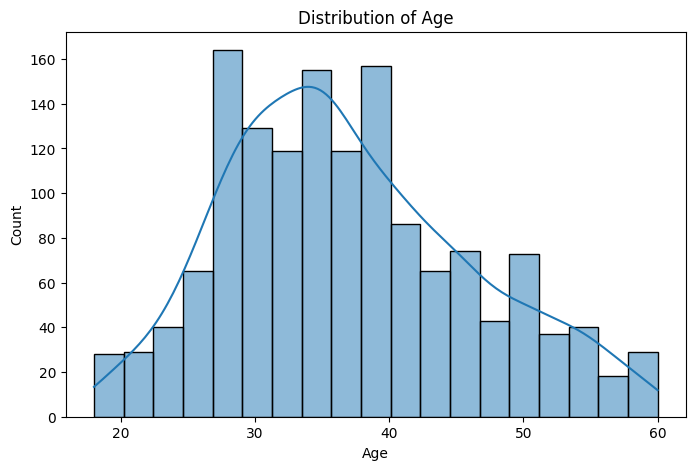

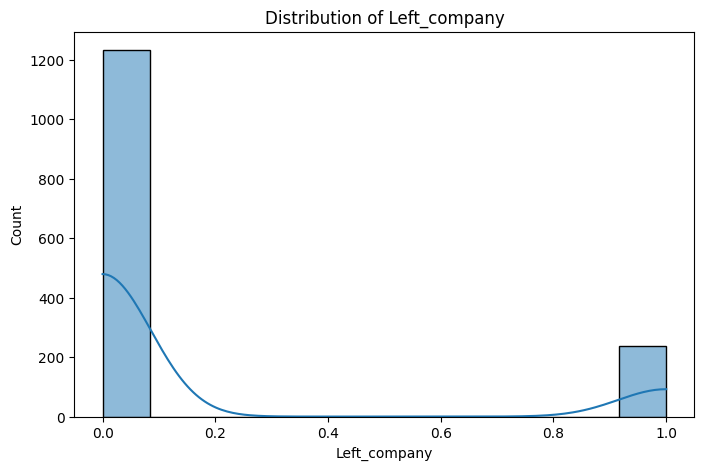

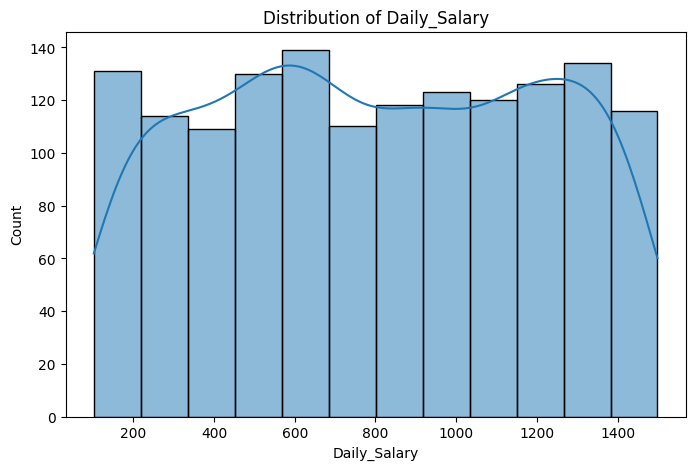

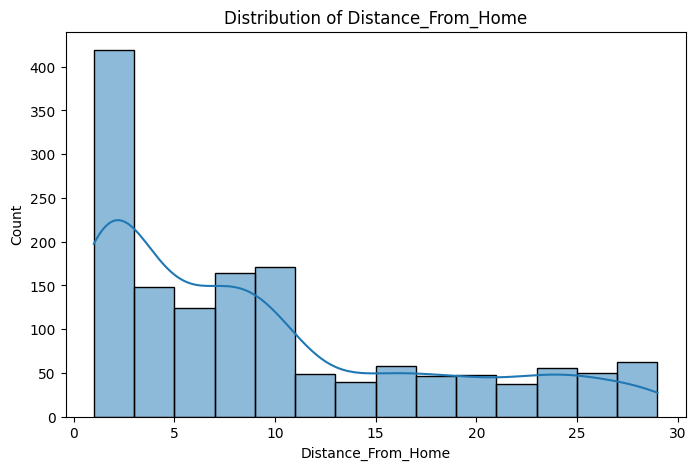

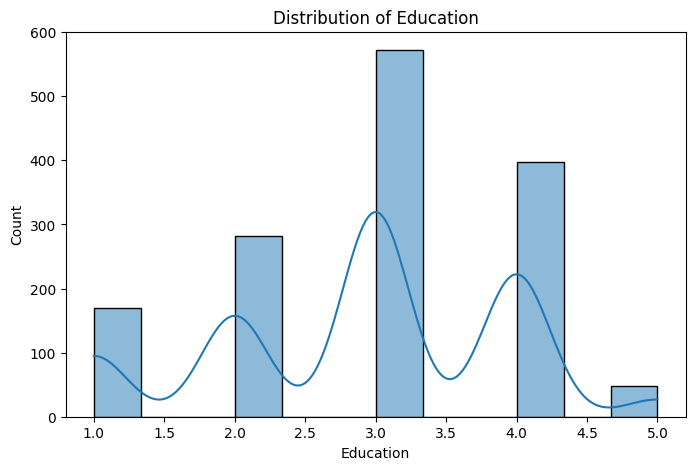

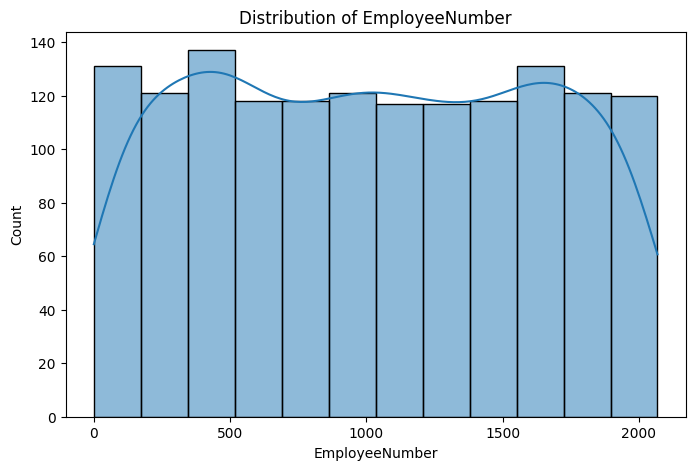

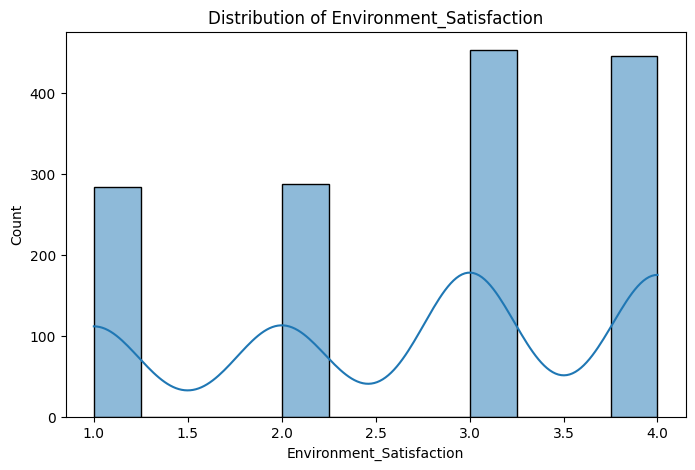

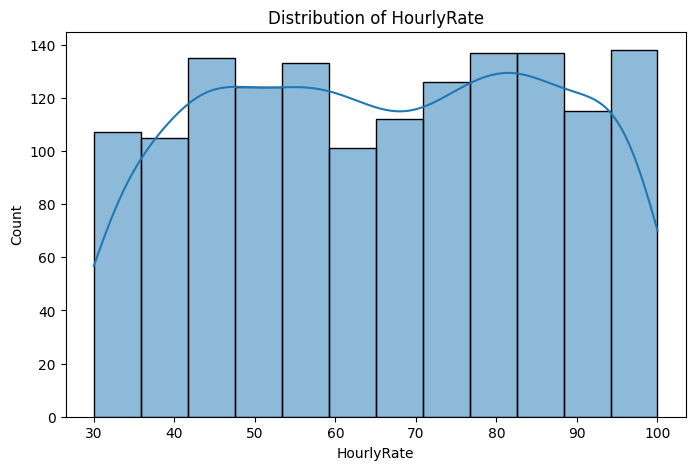

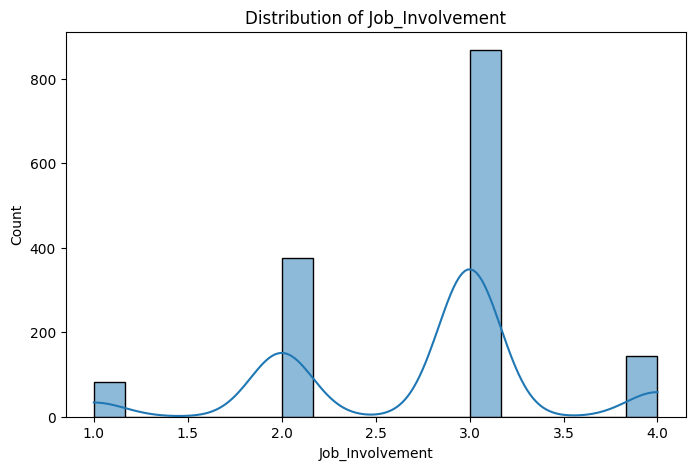

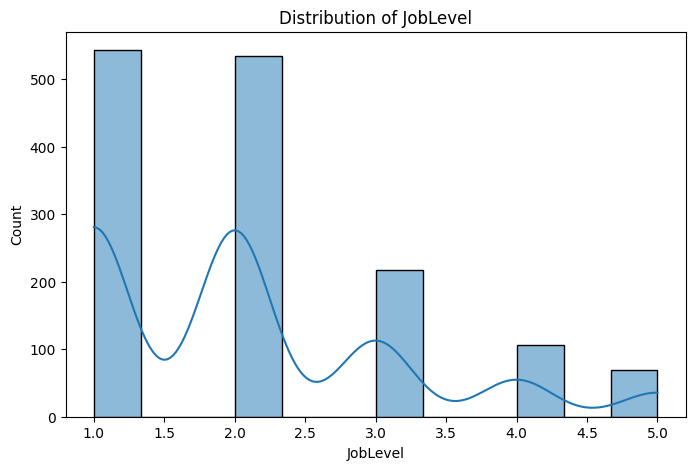

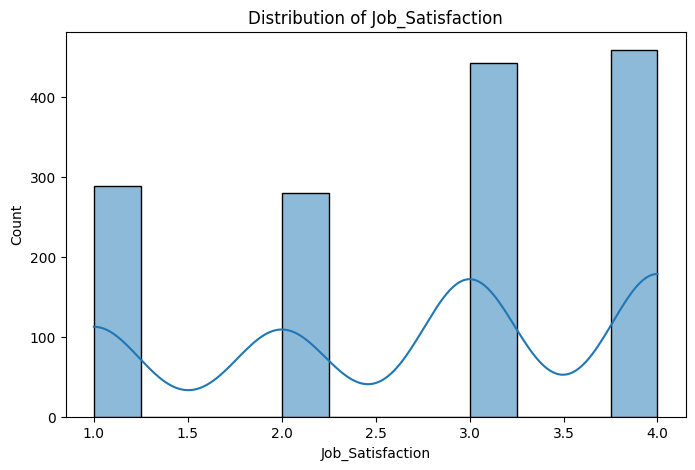

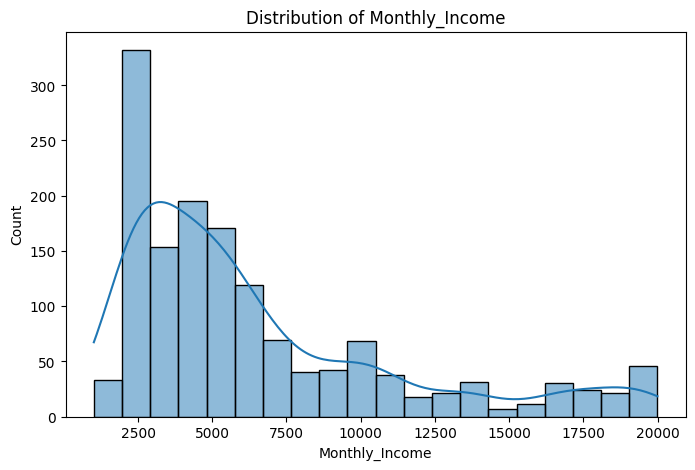

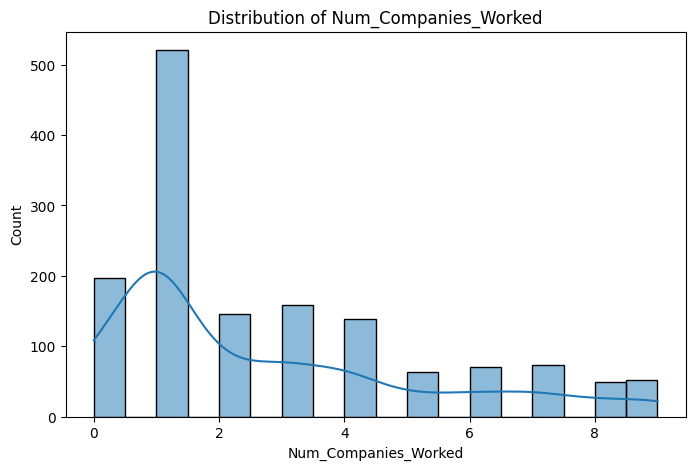

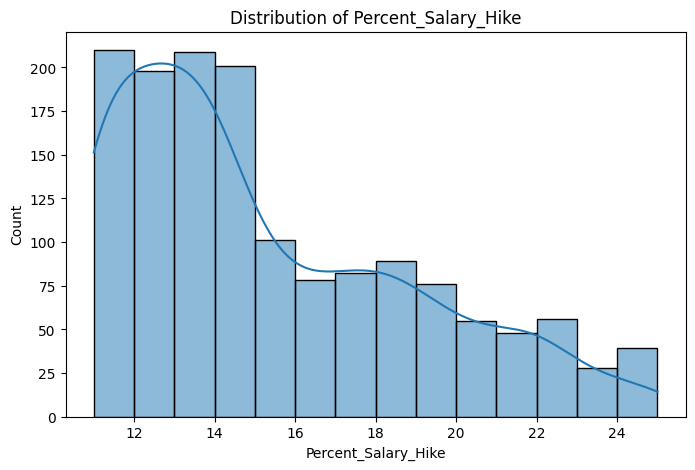

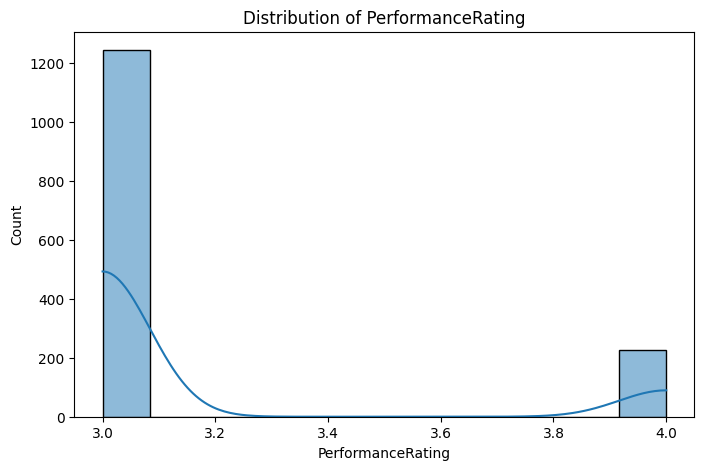

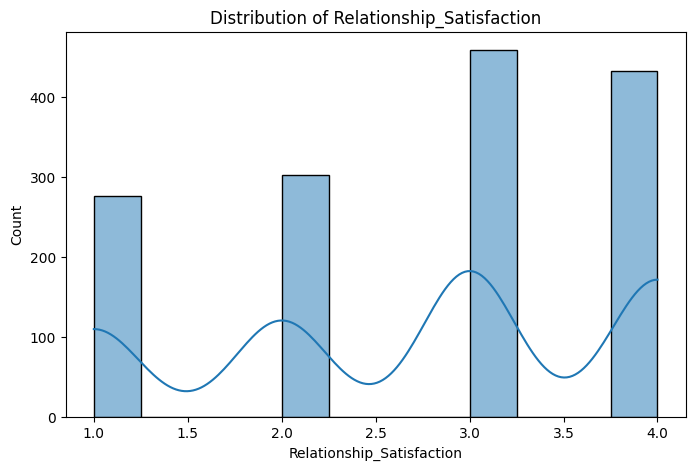

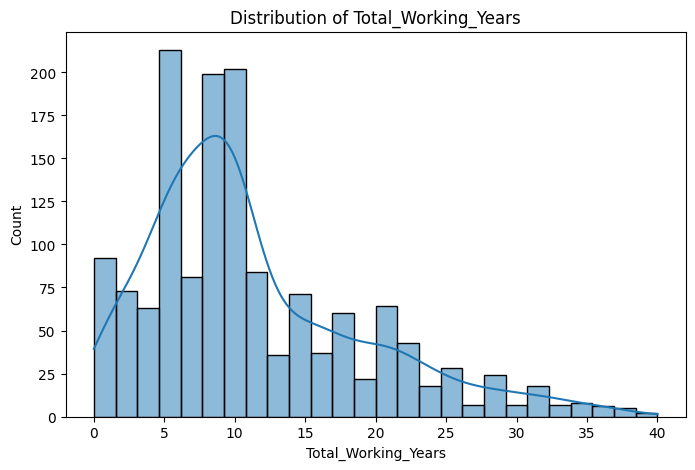

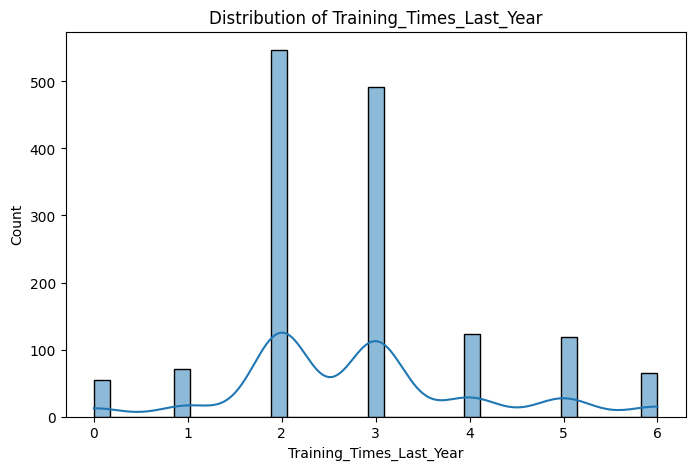

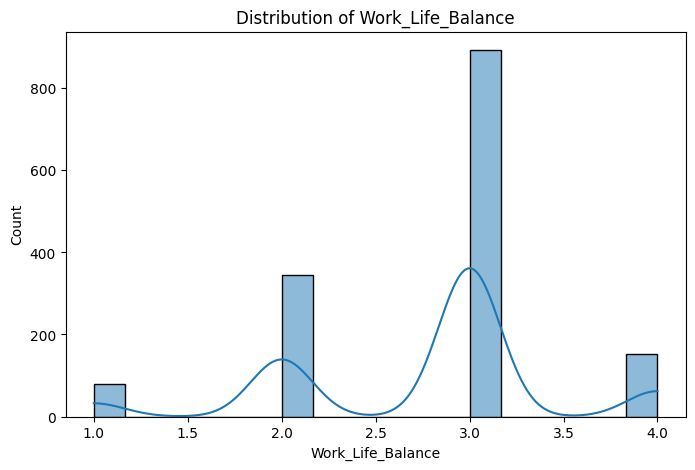

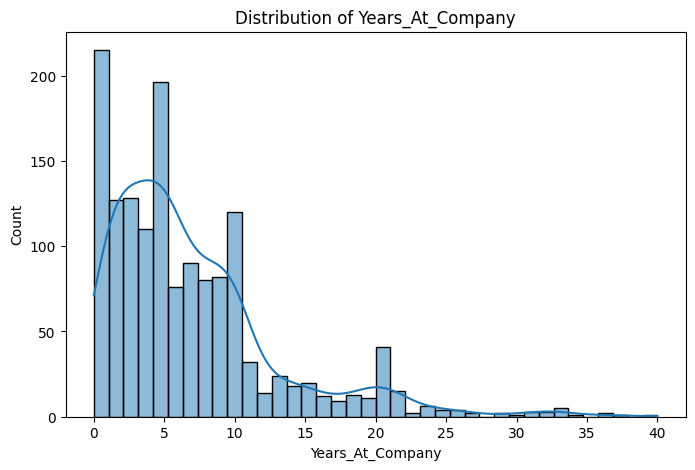

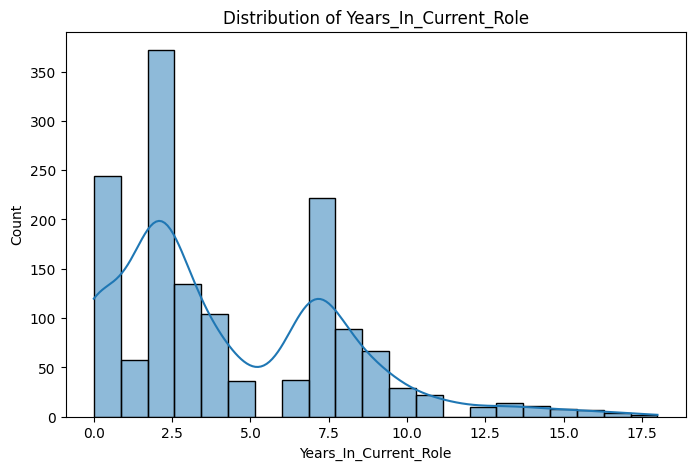

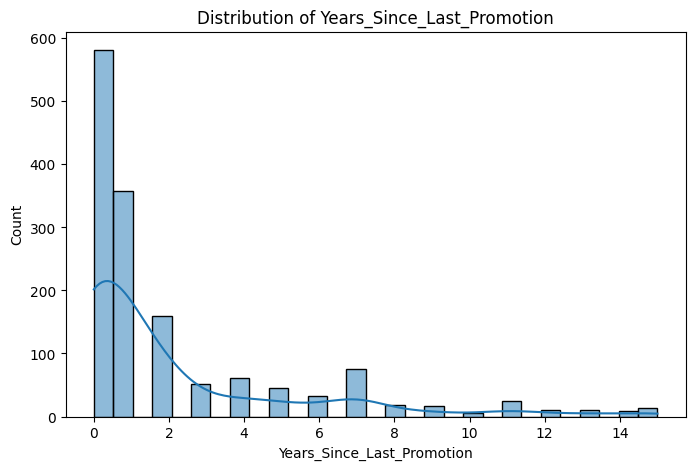

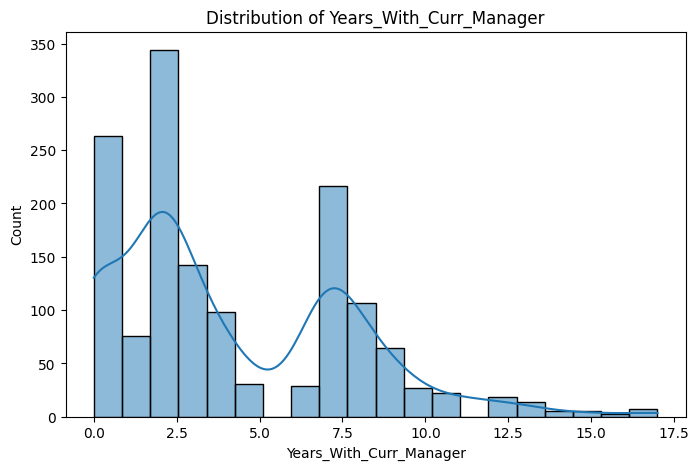

In [151]:
# Distribution of numerical features
numerical_features = df.select_dtypes(include=['int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

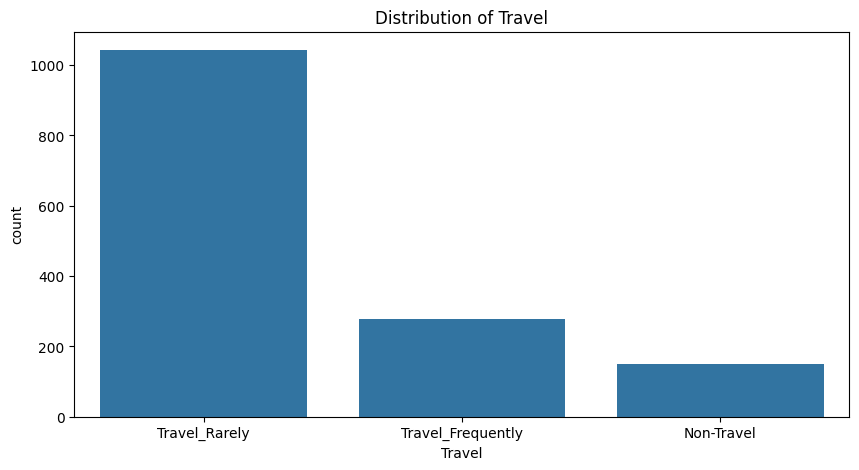

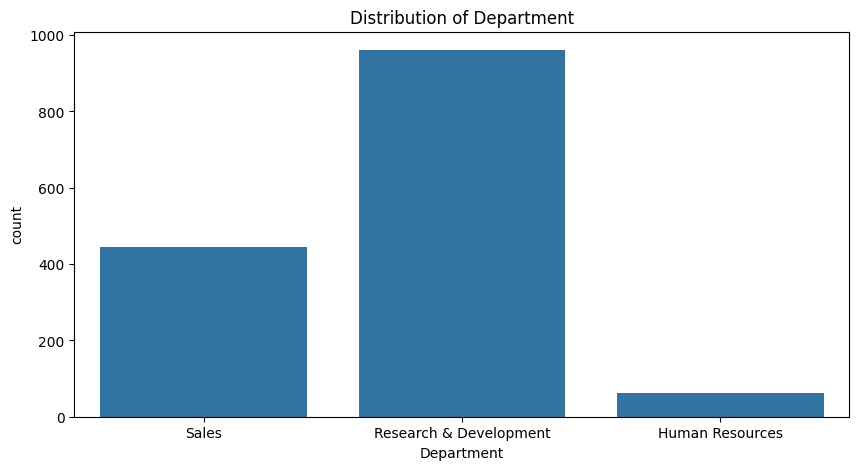

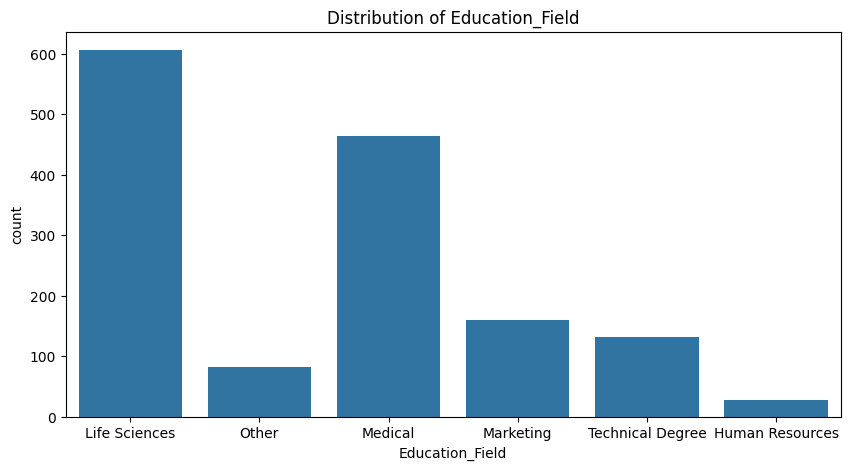

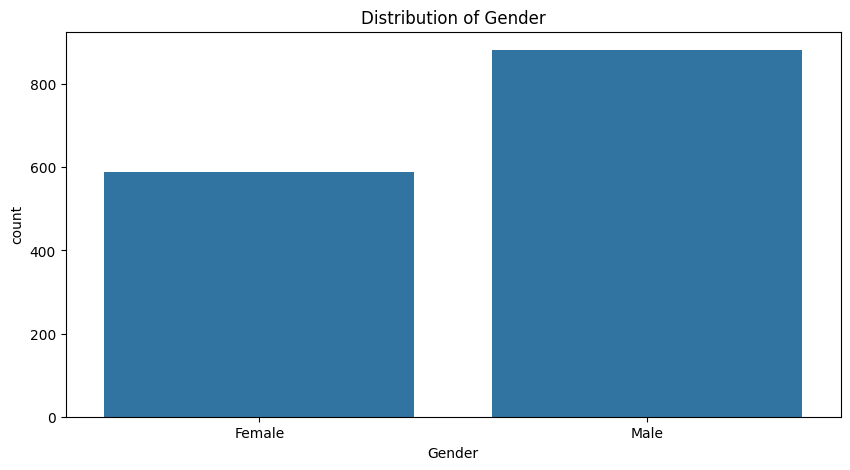

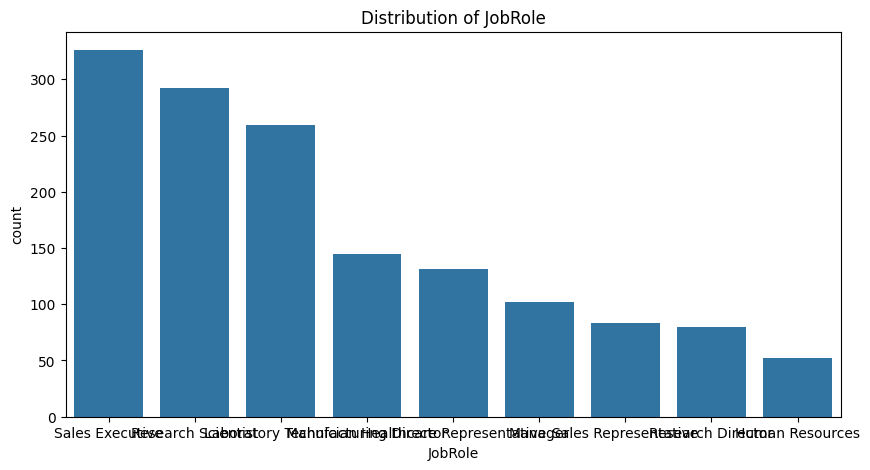

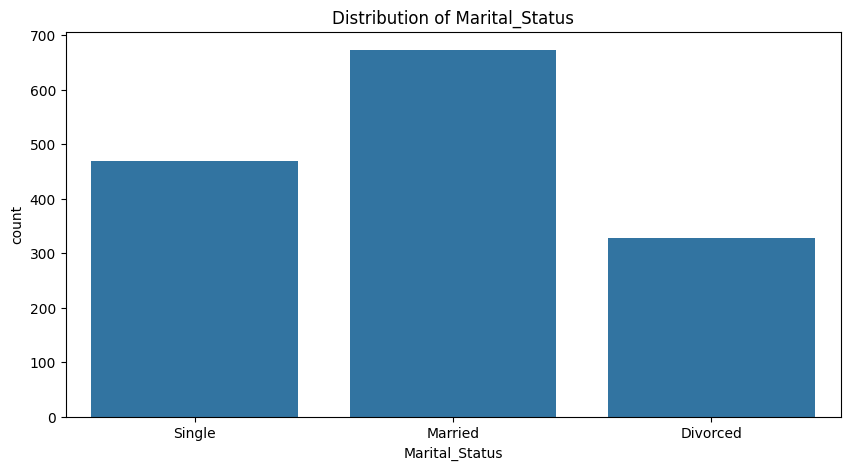

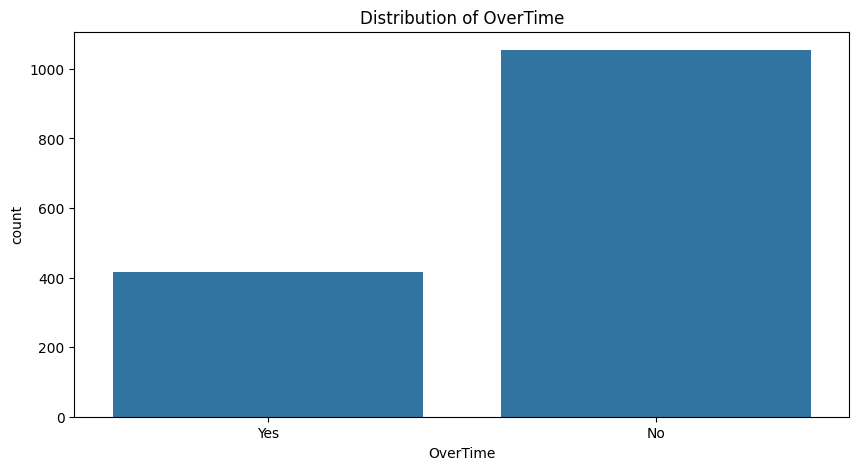

In [152]:
# Distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=df)
    plt.title(f'Distribution of {feature}')
    plt.show()

#which department has highest left_company rate

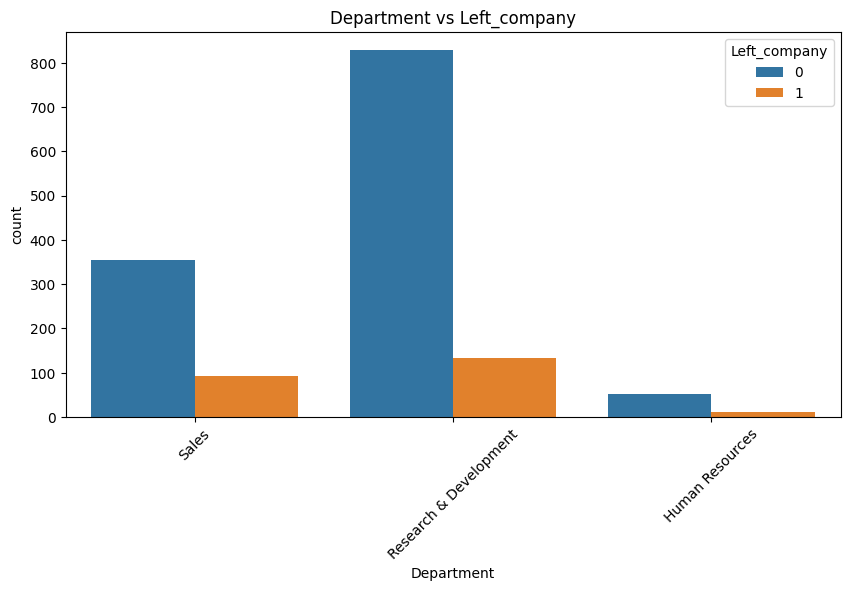

In [157]:
# Countplot of Department vs Attrition
plt.figure(figsize=(10, 5))
sns.countplot(x='Department', hue='Left_company', data=df)
plt.title('Department vs Left_company')
plt.xticks(rotation=45)
plt.show()

#which job role has highest left the company

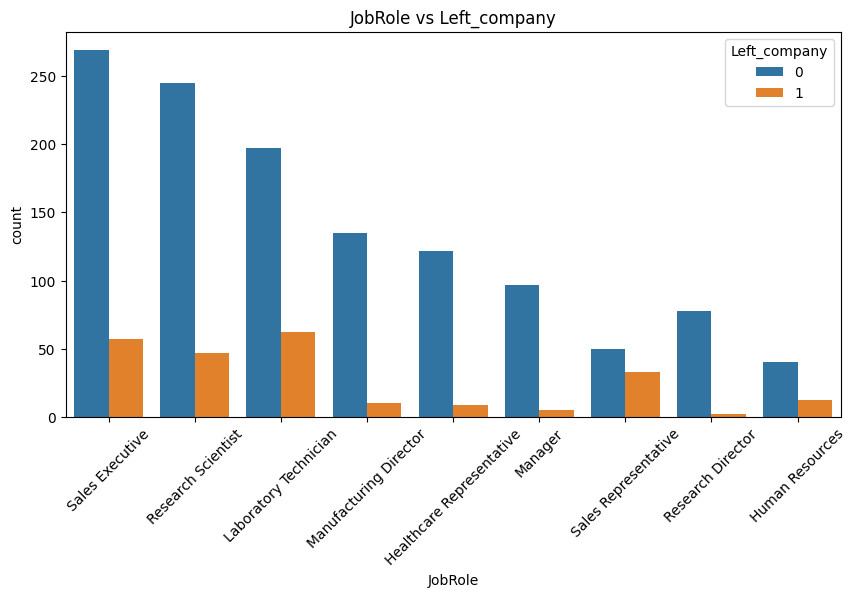

In [158]:
# Countplot of JobRole vs Left_company
plt.figure(figsize=(10, 5))
sns.countplot(x='JobRole', hue='Left_company', data=df)
plt.title('JobRole vs Left_company')
plt.xticks(rotation=45)
plt.show()

#compare using pairplot

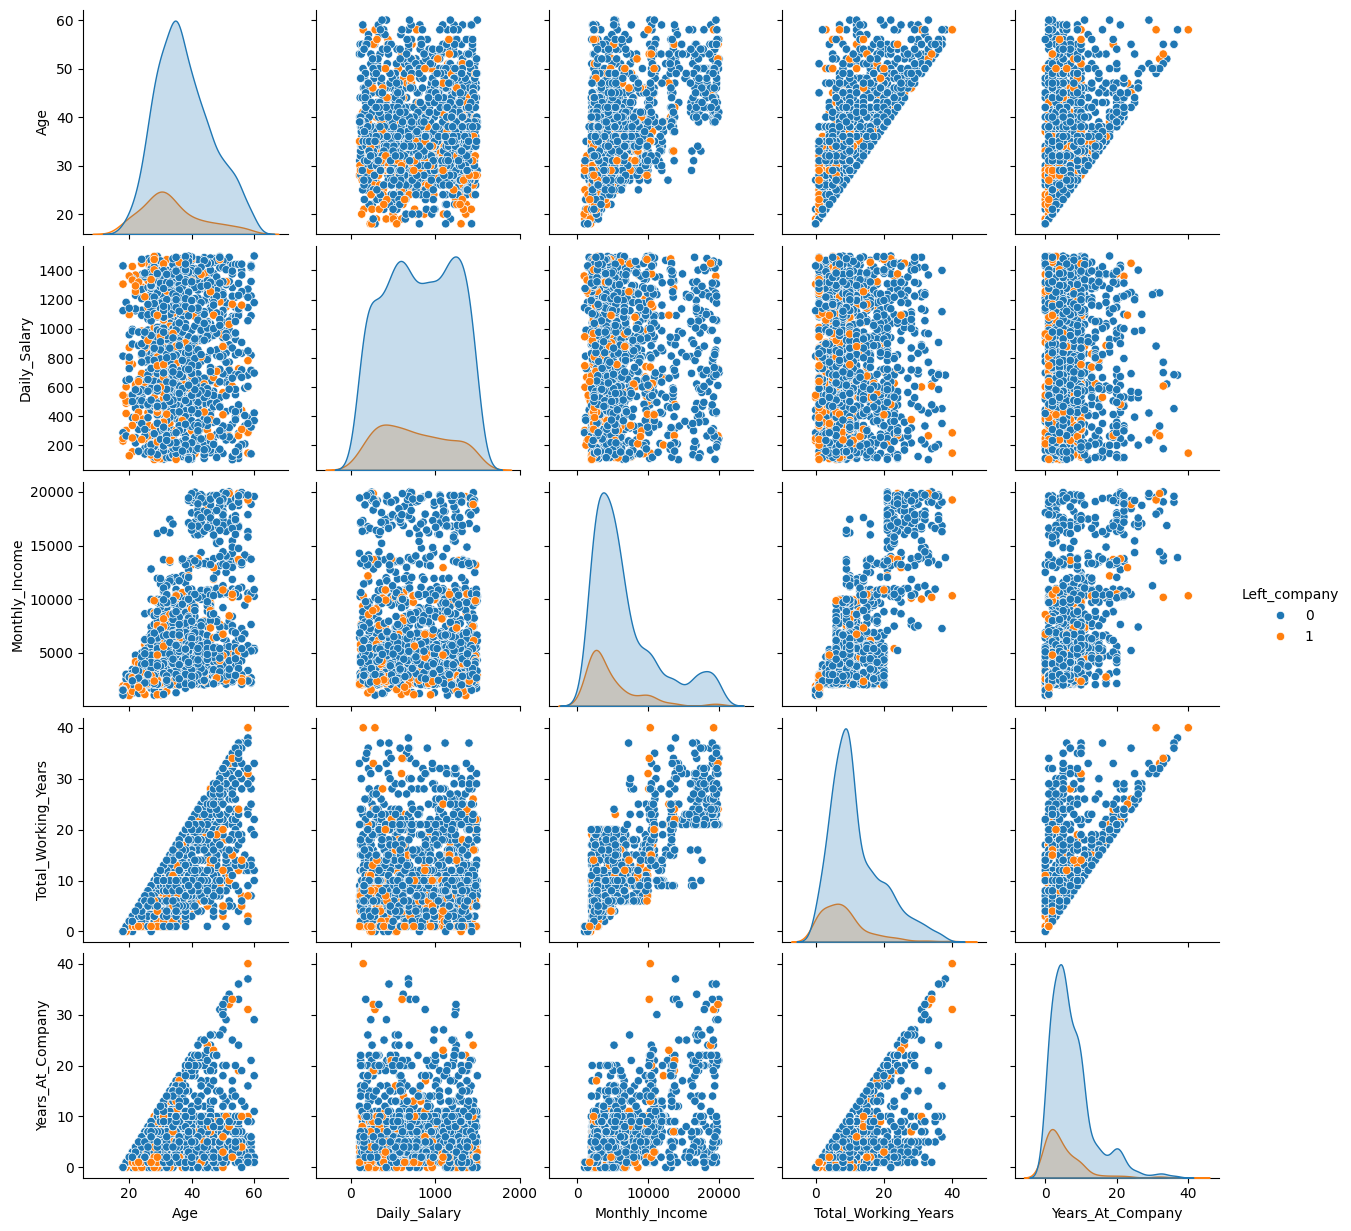

In [160]:
# Select a subset of features for pairplot
subset = ['Age', 'Daily_Salary', 'Monthly_Income', 'Total_Working_Years', 'Years_At_Company', 'Left_company']

# Create pairplot
sns.pairplot(df[subset], hue='Left_company')
plt.show()

#***Number of Employees Who Left by Department***

In [161]:
# List unique departments
unique_departments = df['Department'].unique()
print("Unique Departments:", unique_departments)

Unique Departments: ['Sales' 'Research & Development' 'Human Resources']


In [162]:
# Count  of each department
department_counts = df['Department'].value_counts()
print("Department Counts:\n", department_counts)

Department Counts:
 Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


#compare department wise left- company
-which department are highest left-company rate

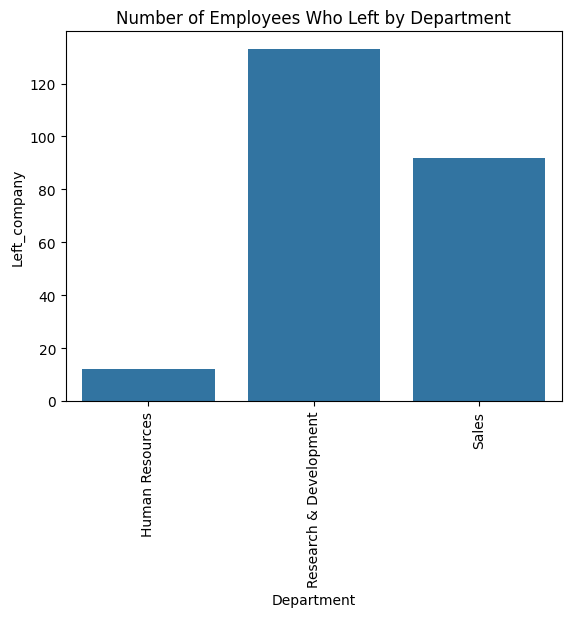

In [170]:
# Group by 'Department' and sum the 'left' column
data_group = df.groupby(by=['Department'], as_index=False)['Left_company'].sum()

# Plot the bar chart
ax = sns.barplot(x="Department", y="Left_company", data=data_group)
plt.xticks(rotation=90)
plt.title('Number of Employees Who Left by Department')
plt.show()

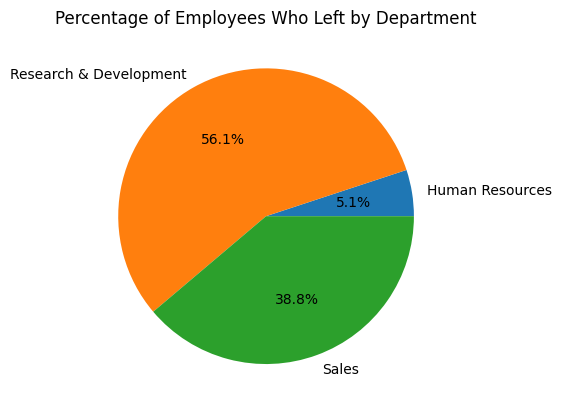

In [169]:
# Plot the pie chart with percentage %
plt.pie(data_group['Left_company'], labels=data_group['Department'], autopct='%1.1f%%')
plt.title('Percentage of Employees Who Left by Department')
plt.show()

##Monthly_Income that can lead to left_company

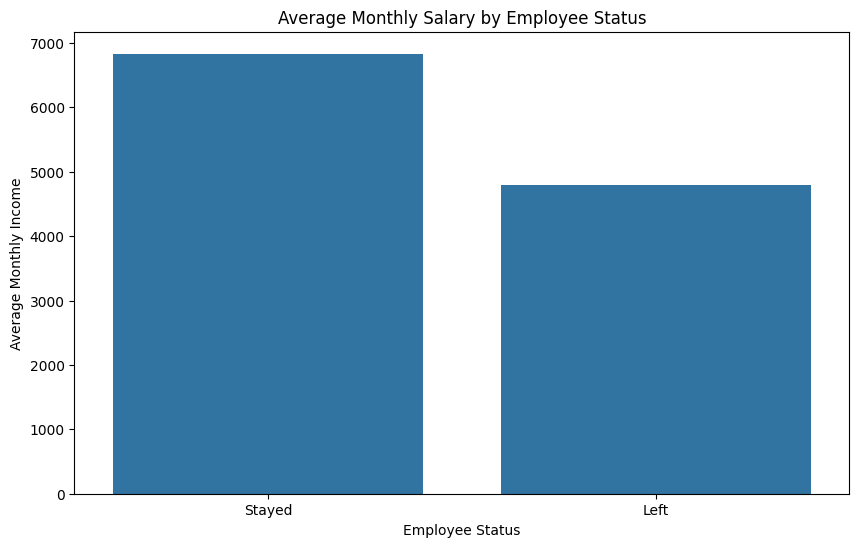

In [168]:
# Create a bar plot
plt.figure(figsize=(10, 6))
avg_salary = df.groupby('Left_company')['Monthly_Income'].mean().reset_index()
sns.barplot(x='Left_company', y='Monthly_Income', data=avg_salary)
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'])
plt.title('Average Monthly Salary by Employee Status')
plt.xlabel('Employee Status')
plt.ylabel('Average Monthly Income')
plt.show()


#Department on job satisfaction

<ipython-input-174-5d95be967df5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Department', y='Job_Satisfaction', data=avg_job_satisfaction, palette='viridis')


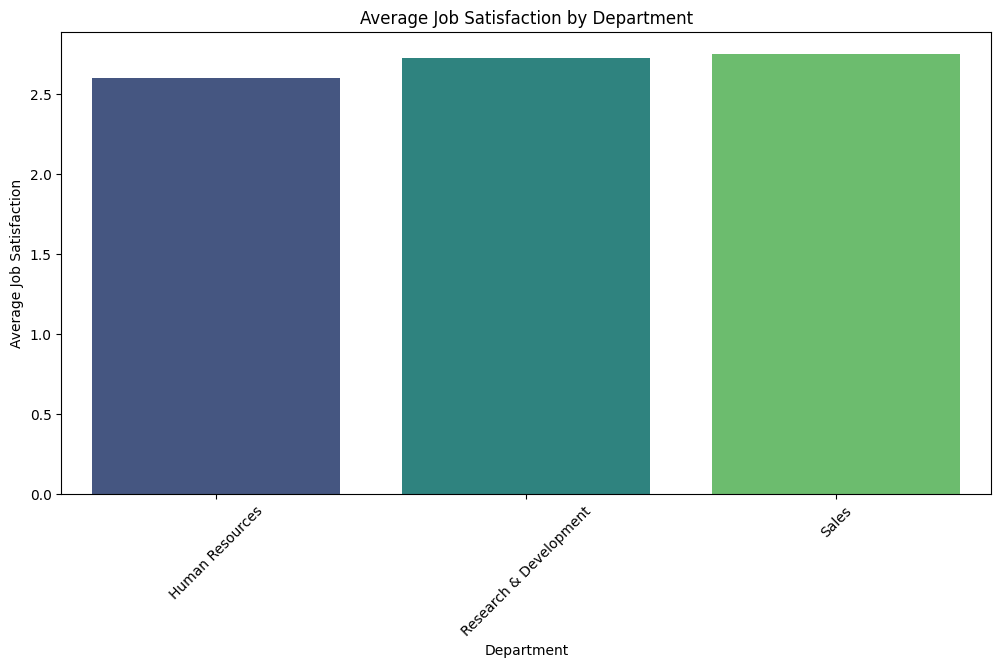

In [174]:
# Calculate average job satisfaction by department
avg_job_satisfaction = df.groupby('Department')['Job_Satisfaction'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Department', y='Job_Satisfaction', data=avg_job_satisfaction, palette='viridis')

# Set the title and labels
plt.title('Average Job Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Average Job Satisfaction')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Does the marital status affect job invlvement

<ipython-input-181-146a63eb8bb4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital_Status', y='Job_Involvement', data=mean_job_involvement, palette='pastel')


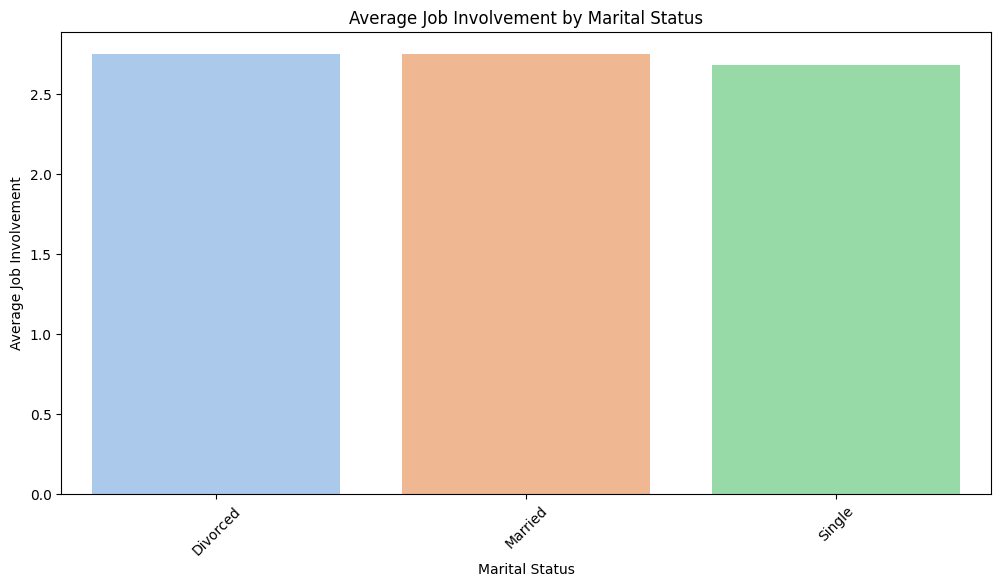

In [181]:
# Calculate the mean job involvement by marital status
mean_job_involvement = df.groupby('Marital_Status')['Job_Involvement'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Marital_Status', y='Job_Involvement', data=mean_job_involvement, palette='pastel')

# Set the title and labels
plt.title('Average Job Involvement by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Job Involvement')
plt.xticks(rotation=45)
plt.show()


#Does enviromental satisfection affect on job satiscation then cause to left_company

<ipython-input-187-2e0c577eb9e2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Left_company', y='Environment_Satisfaction', data=mean_env_satisfaction, palette='pastel')


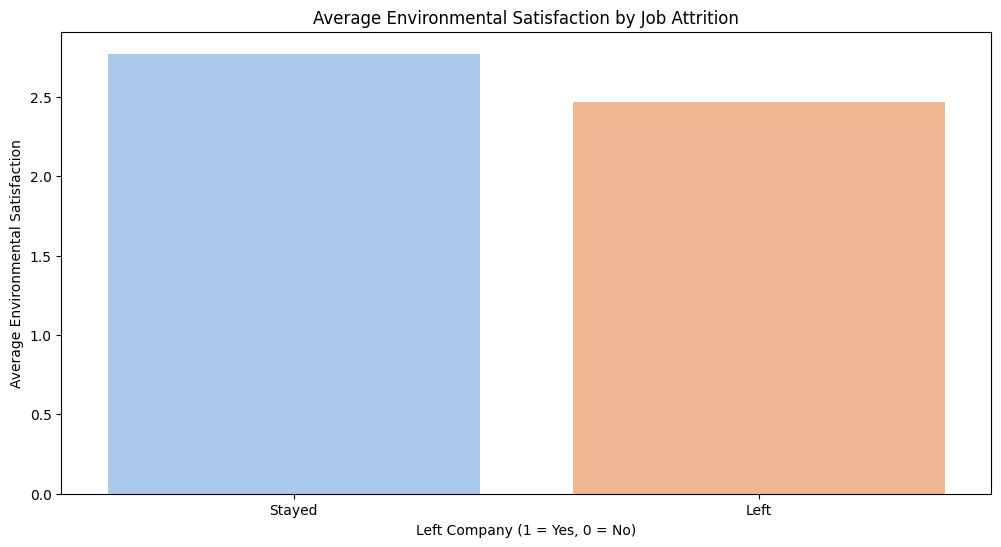

In [187]:
# Calculate the mean environmental satisfaction by whether the employee left
mean_env_satisfaction = df.groupby('Left_company')['Environment_Satisfaction'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Left_company', y='Environment_Satisfaction', data=mean_env_satisfaction, palette='pastel')

# Set the title and labels
plt.title('Average Environmental Satisfaction by Job Attrition')
plt.xlabel('Left Company (1 = Yes, 0 = No)')
plt.ylabel('Average Environmental Satisfaction')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'])
plt.show()

#Does work life balace  cause to left_company

<ipython-input-188-a5ac834583b8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Left_company', y='Work_Life_Balance', data=mean_work_life_balance, palette='pastel')


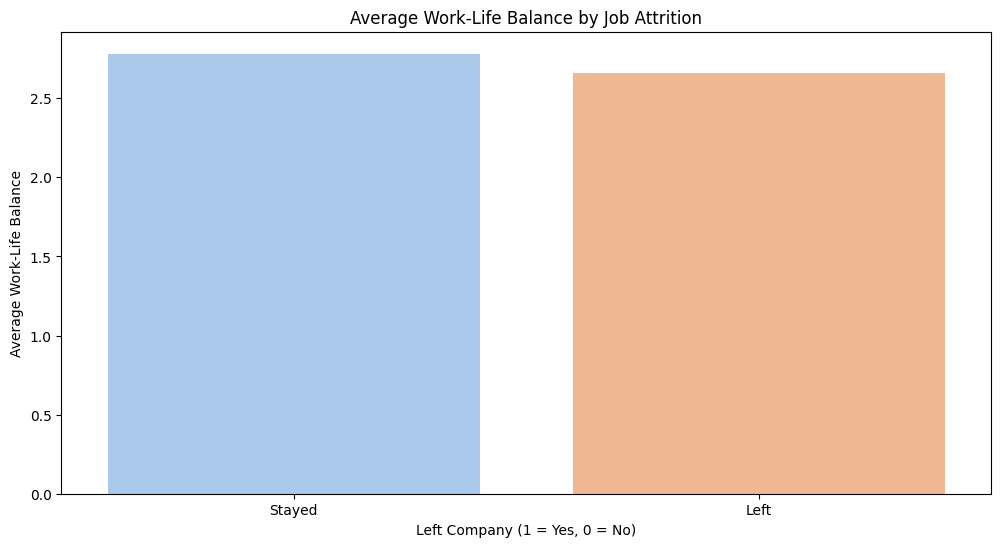

In [188]:
# Calculate the mean work-life balance by whether the employee left
mean_work_life_balance = df.groupby('Left_company')['Work_Life_Balance'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Left_company', y='Work_Life_Balance', data=mean_work_life_balance, palette='pastel')

# Set the title and labels
plt.title('Average Work-Life Balance by Job Attrition')
plt.xlabel('Left Company (1 = Yes, 0 = No)')
plt.ylabel('Average Work-Life Balance')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'])
plt.show()

#visual analyss whole data using super feature module like SWEETVIZ
-we are already anlysing all type of possible analysis of HR data\
-if there are any left that can be done by sweetviz module

In [190]:
#install sweetviz module that can help us to analysis data more and more
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 47.8 MB/s eta 0:00:00


In [191]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



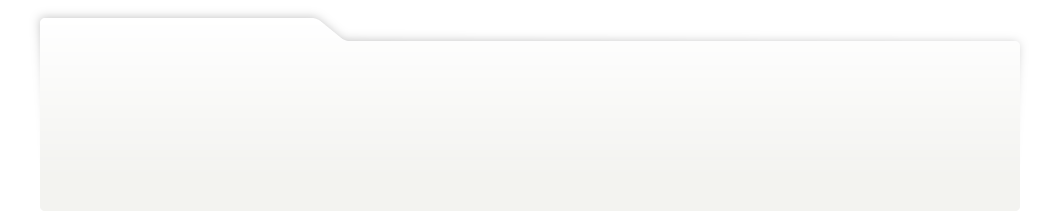
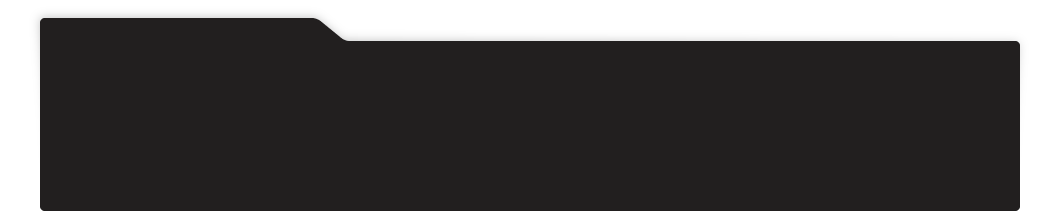
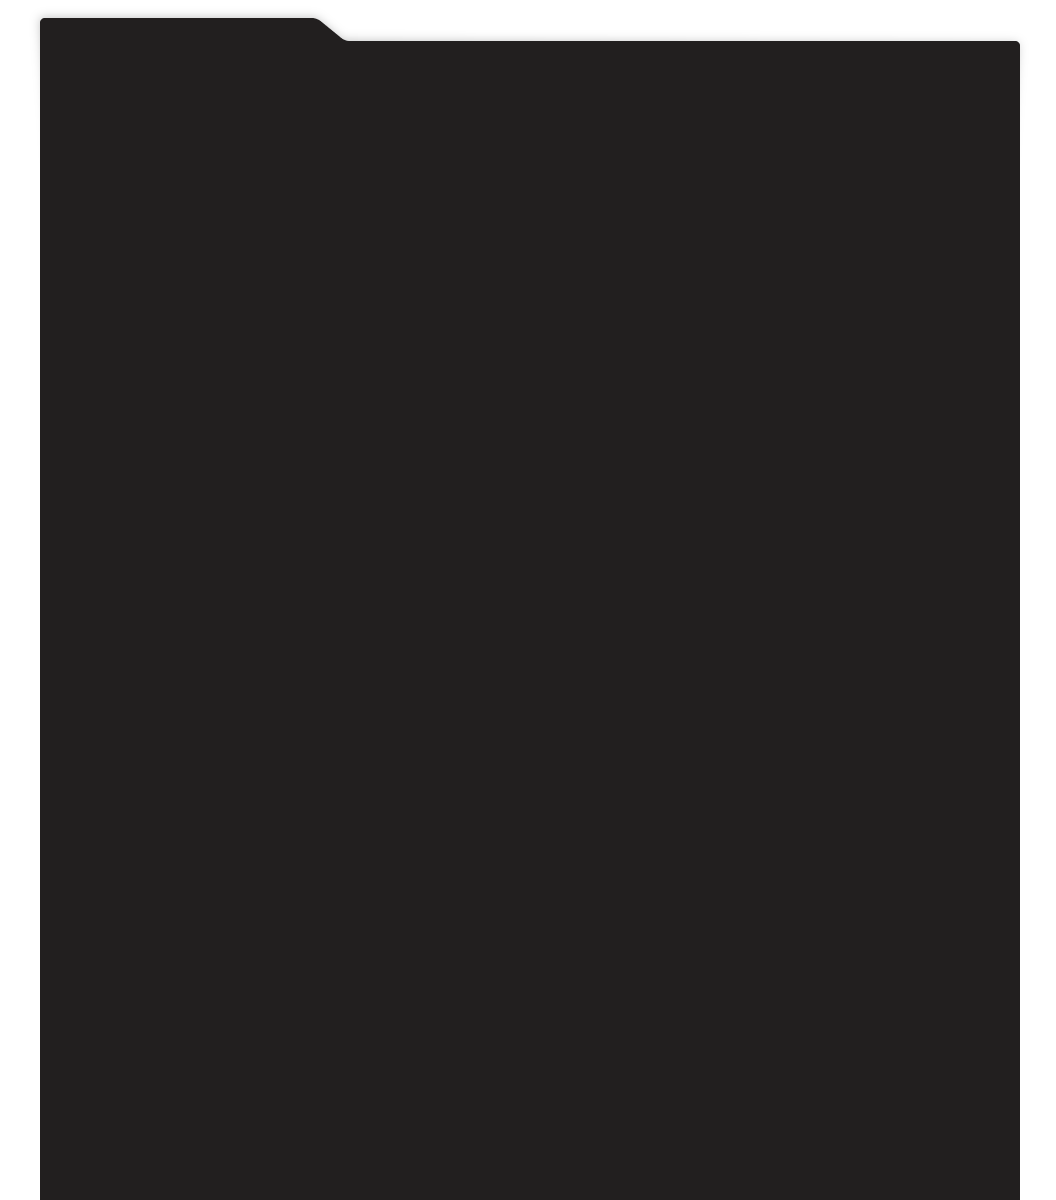
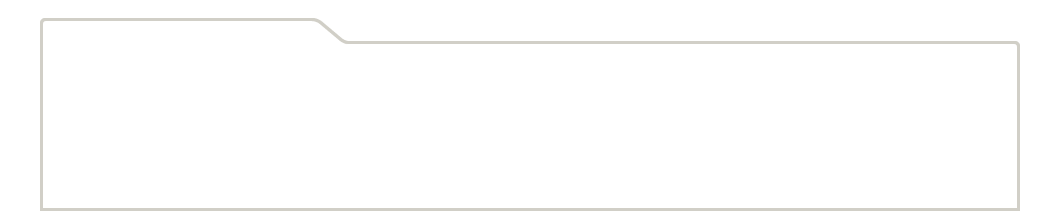
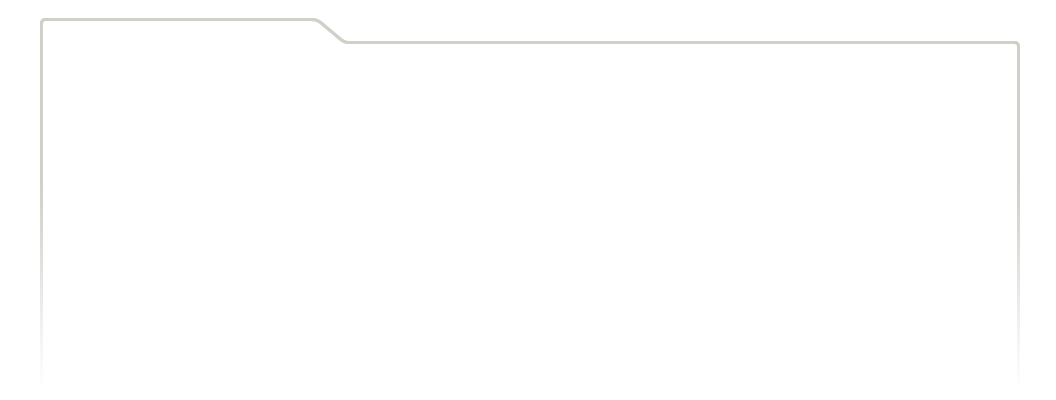
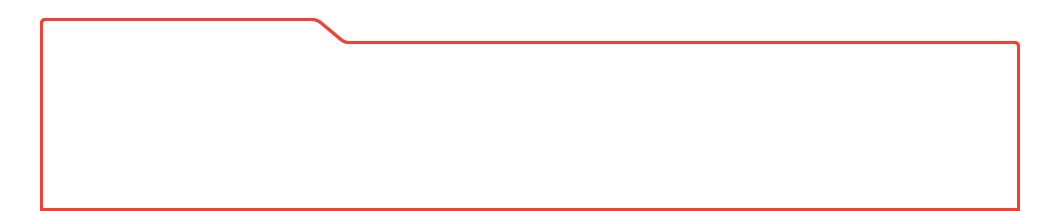
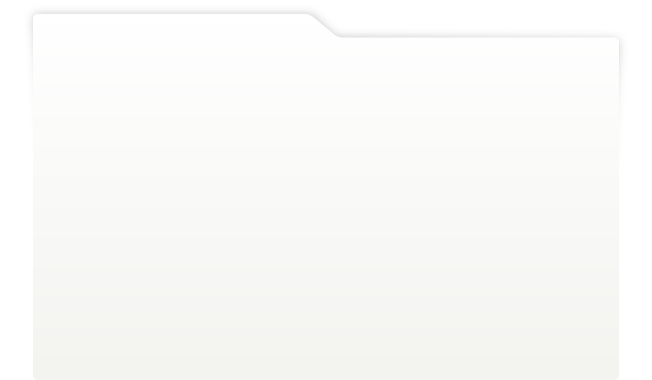
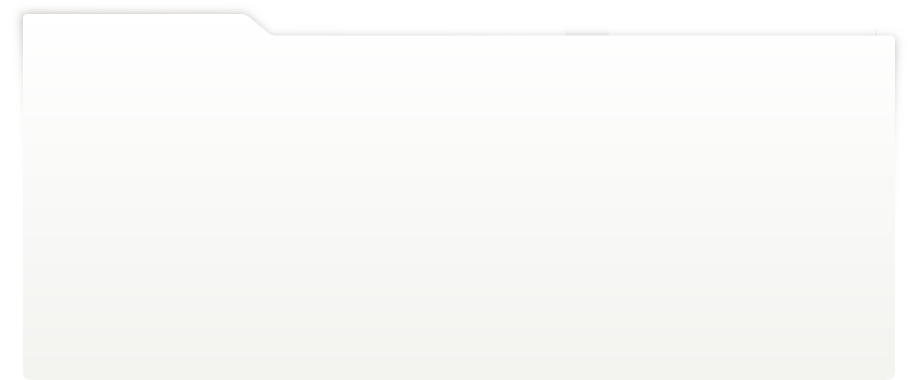
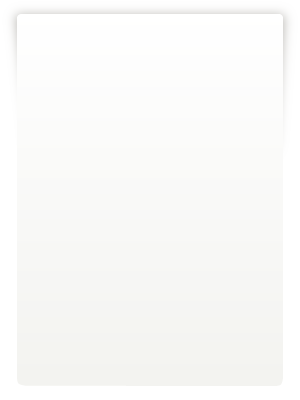
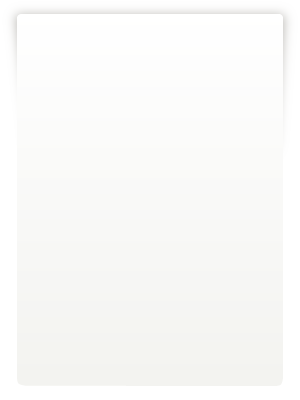
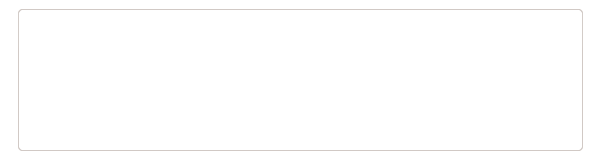
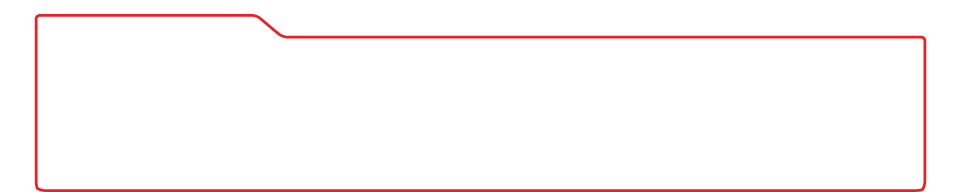
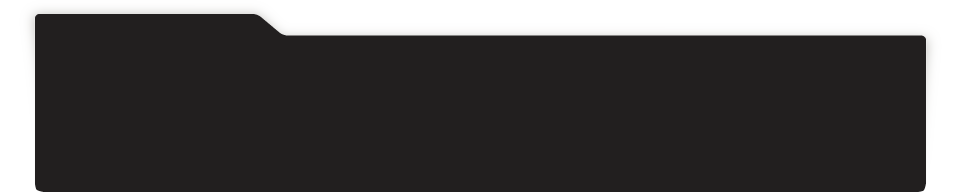
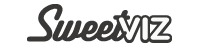
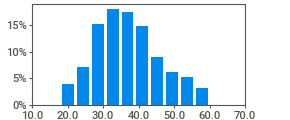
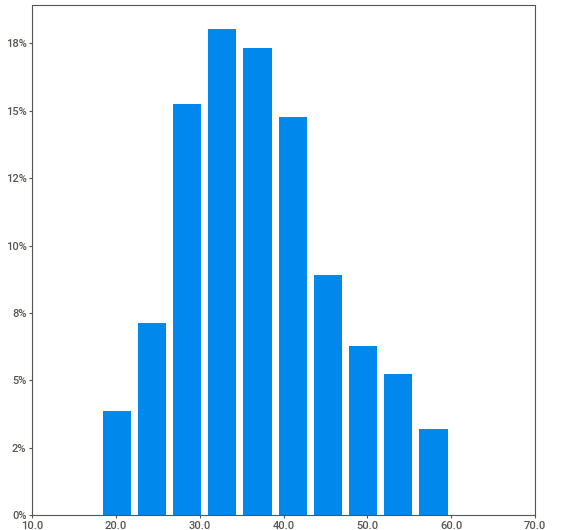
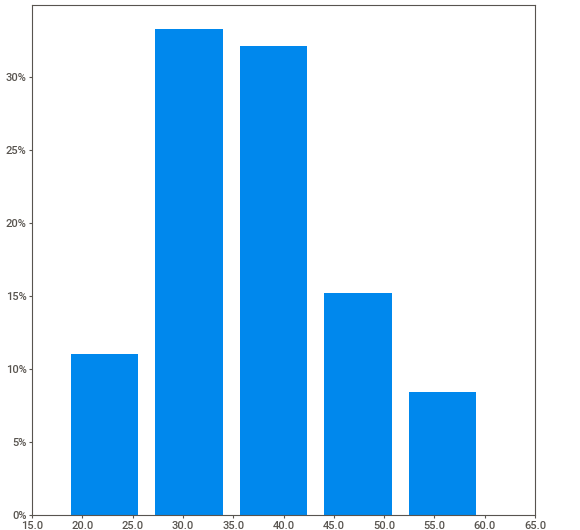
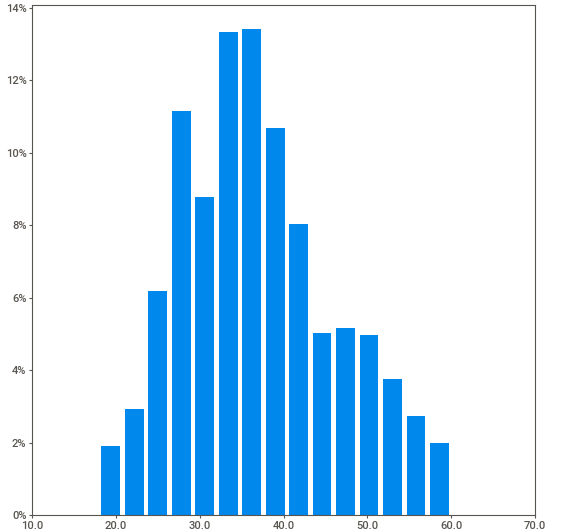
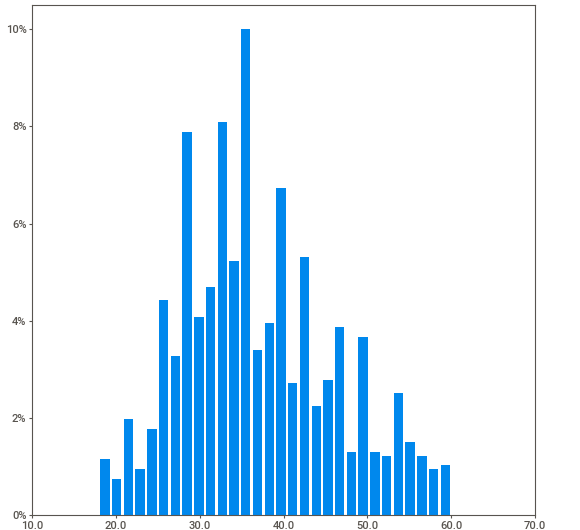
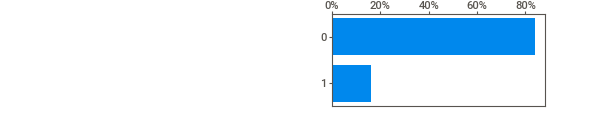
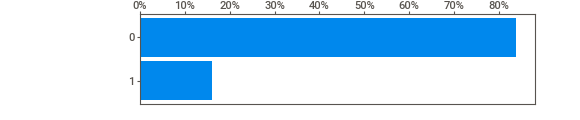
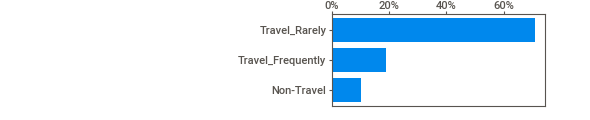
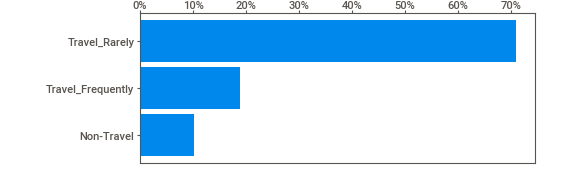
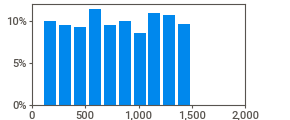
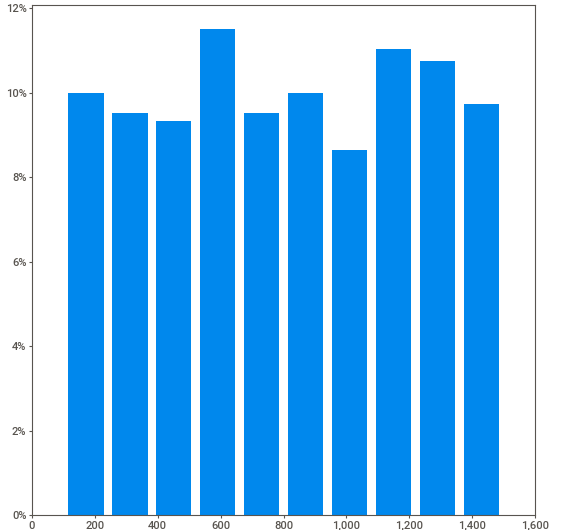
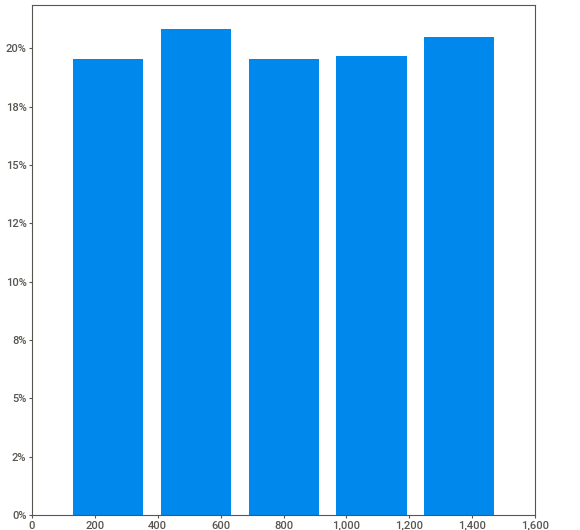
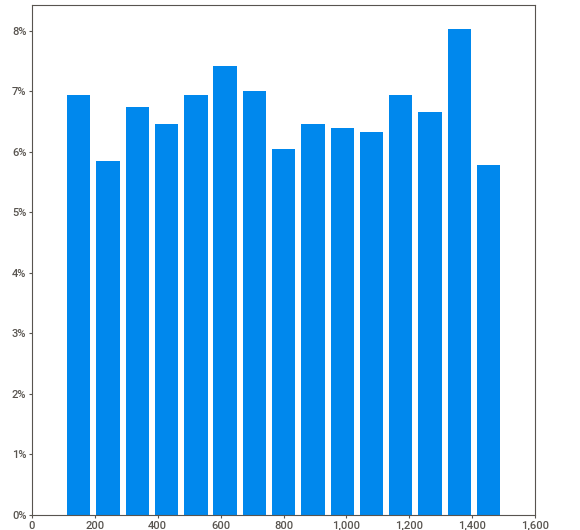
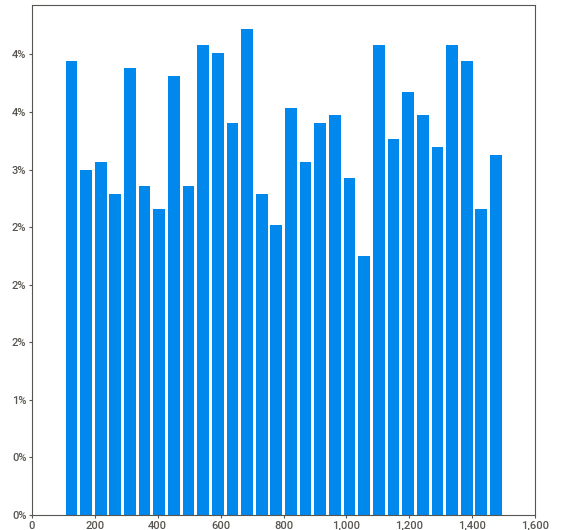
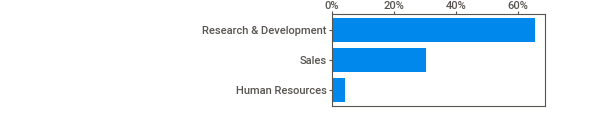
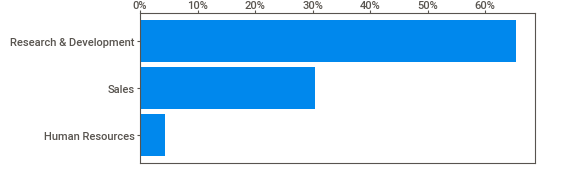
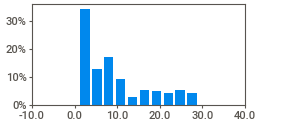
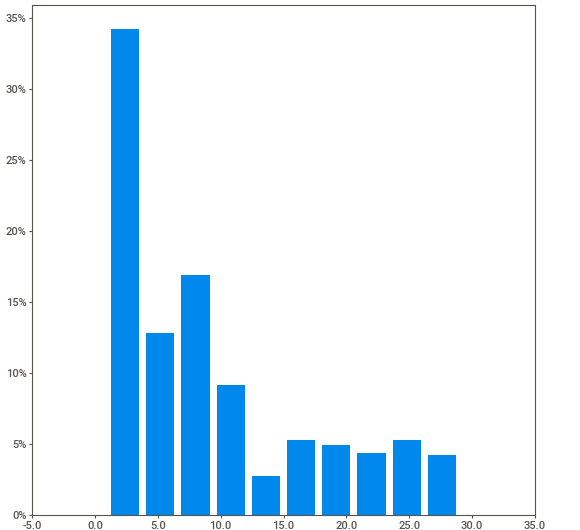
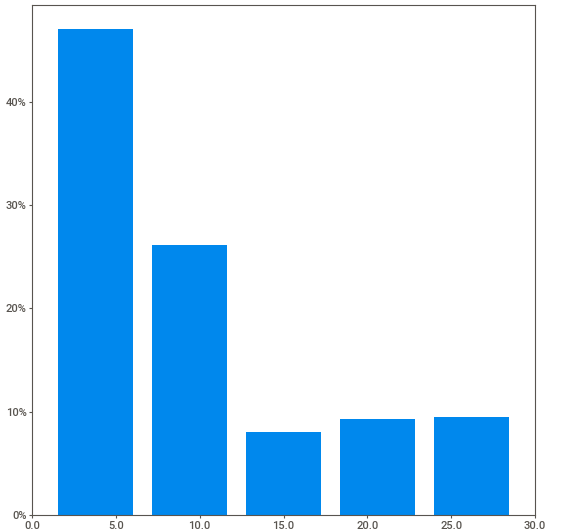
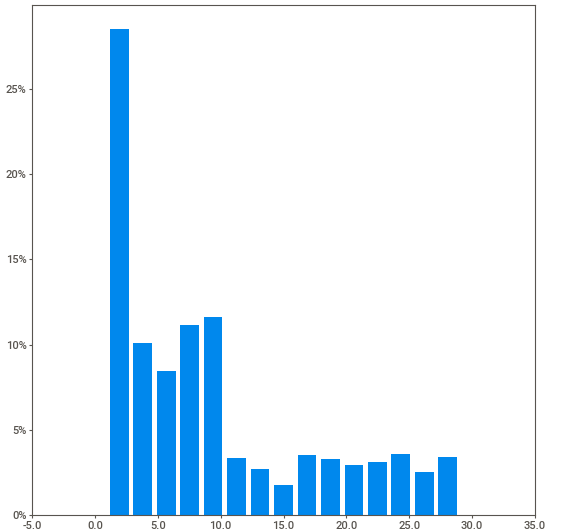
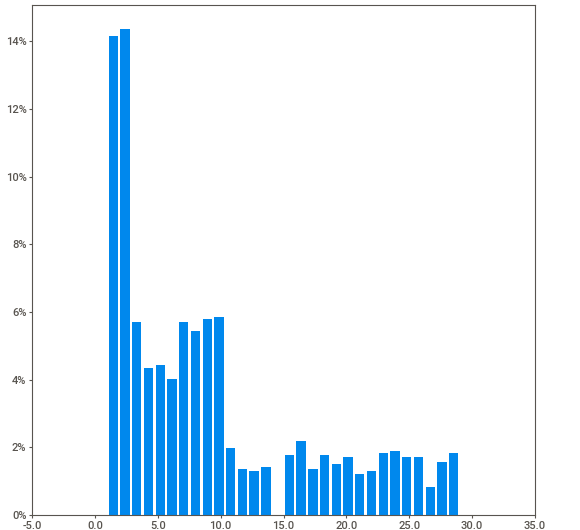
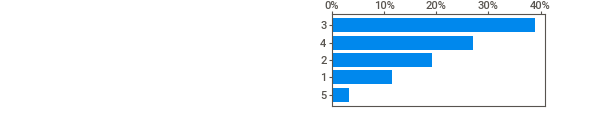
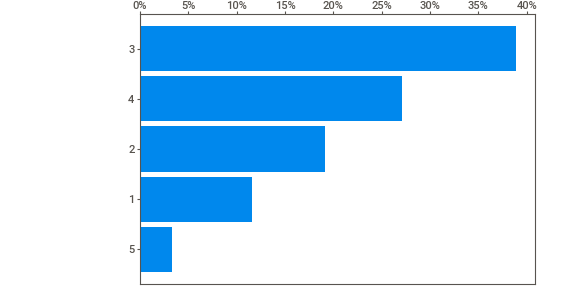
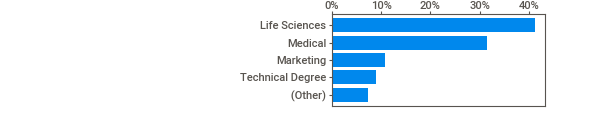
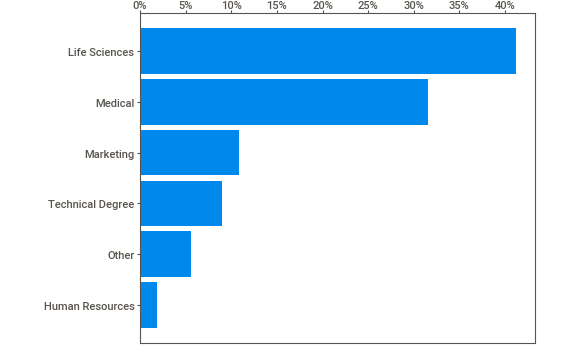
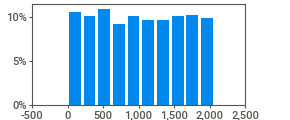
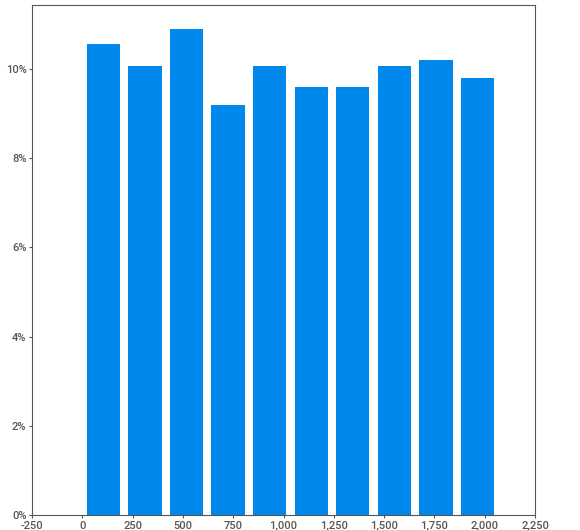
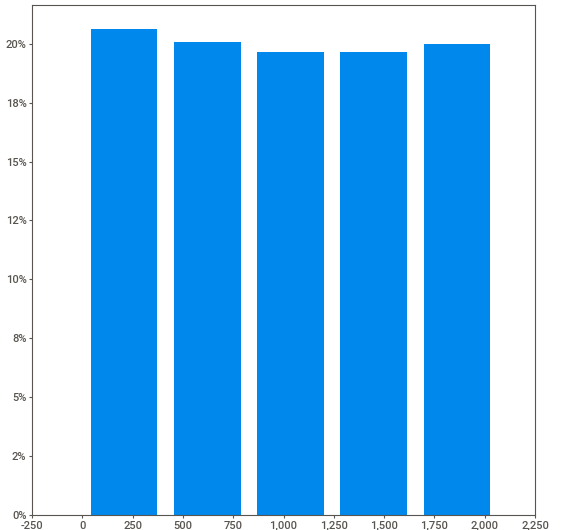
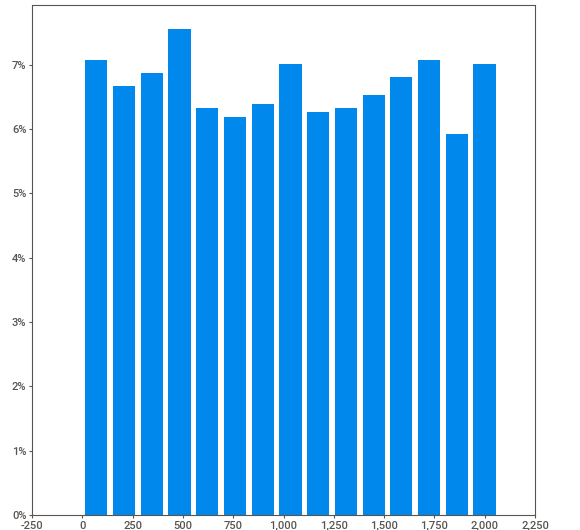
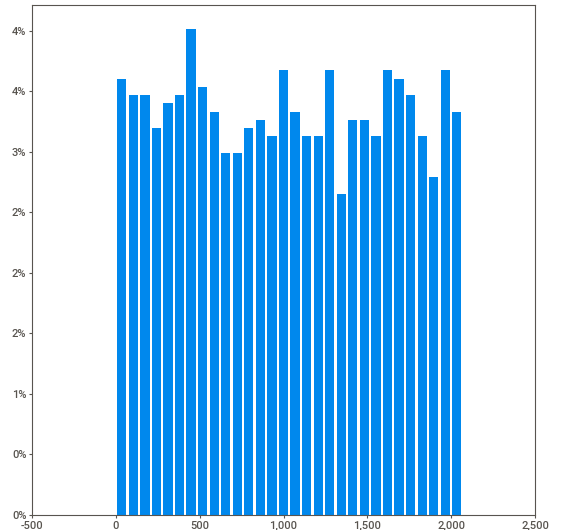
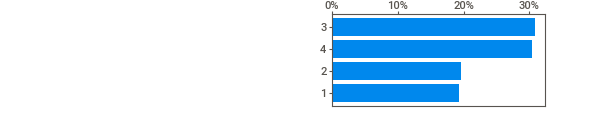
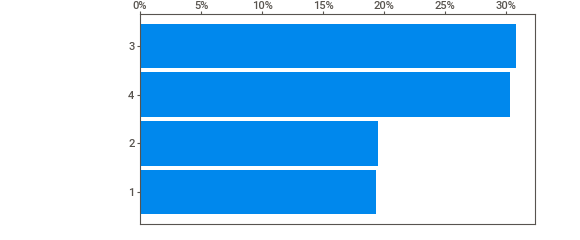
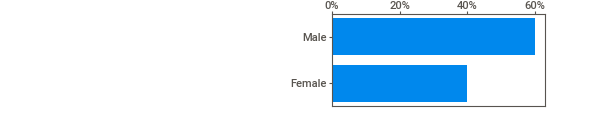
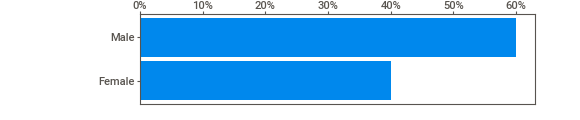
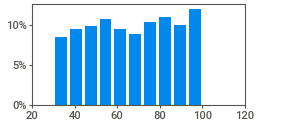
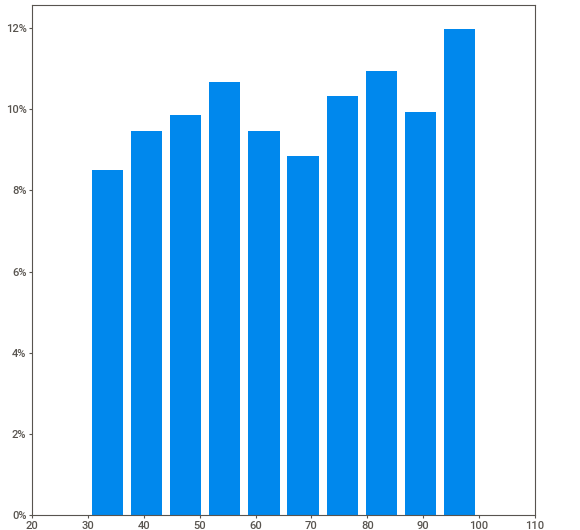
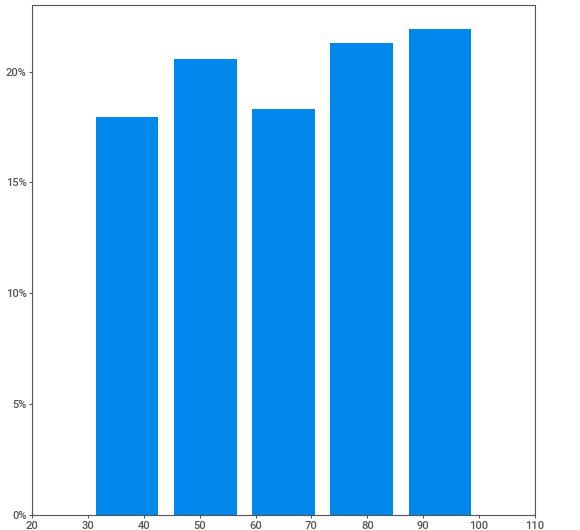
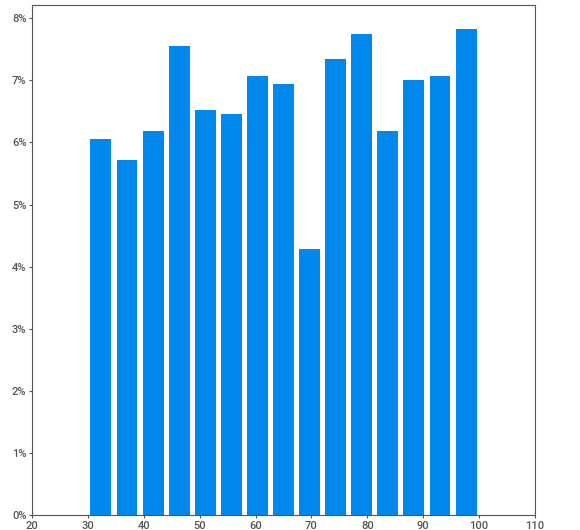
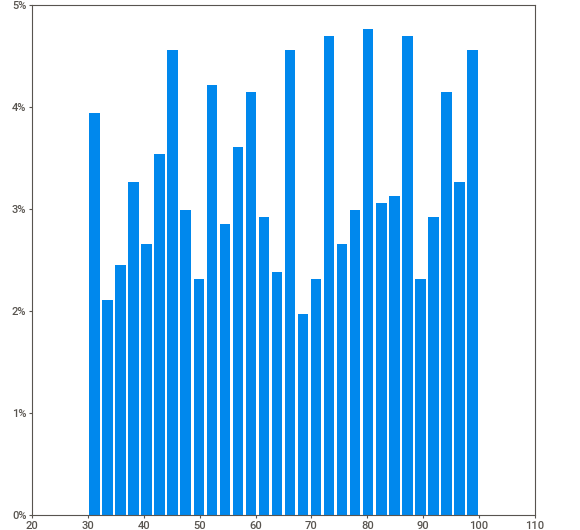
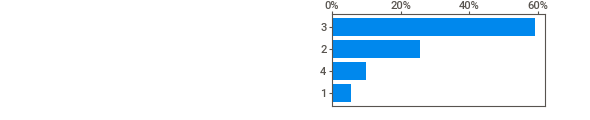
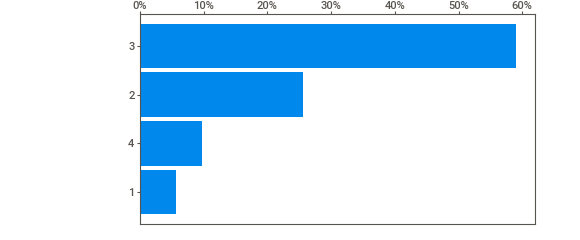
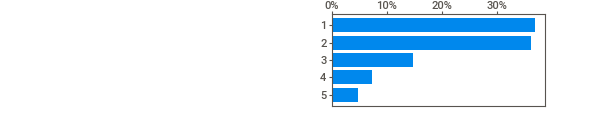
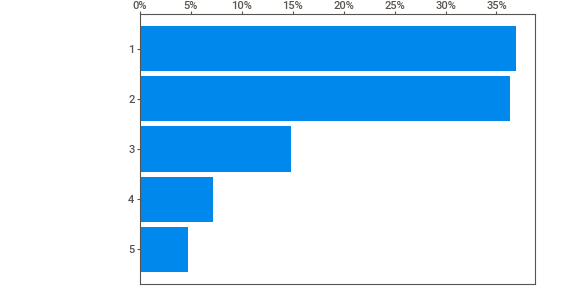
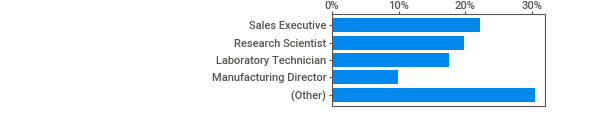
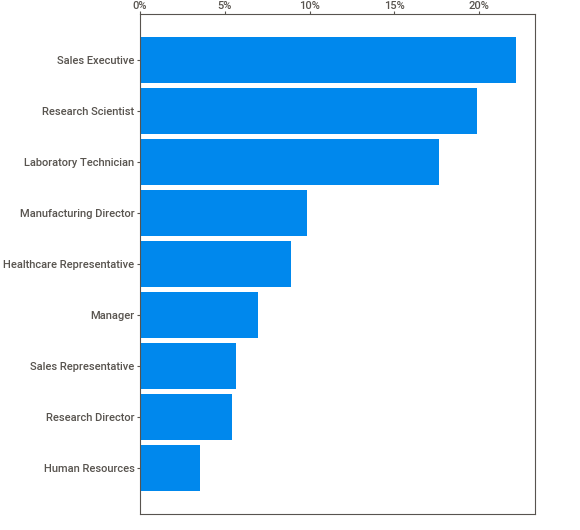
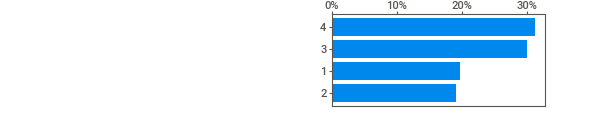
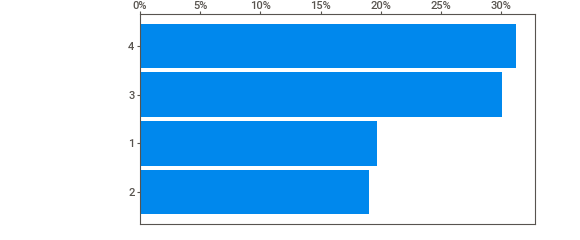
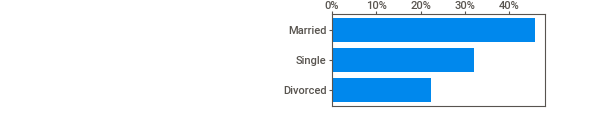
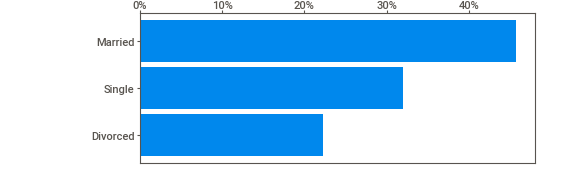
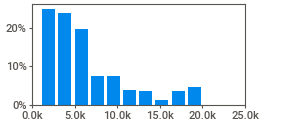
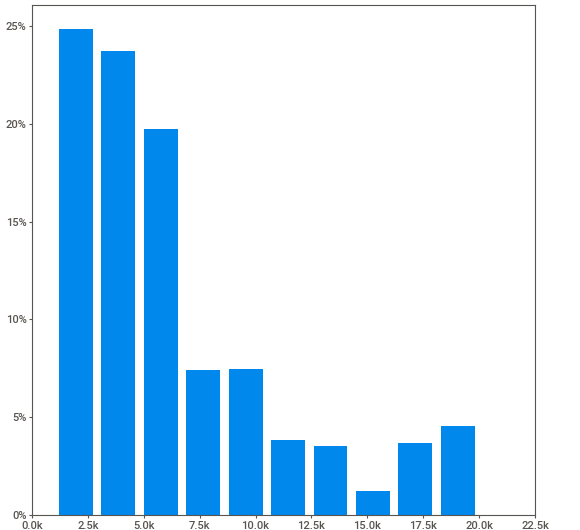
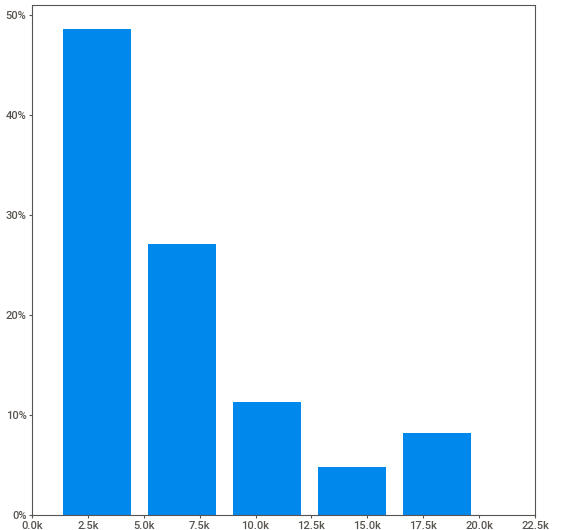
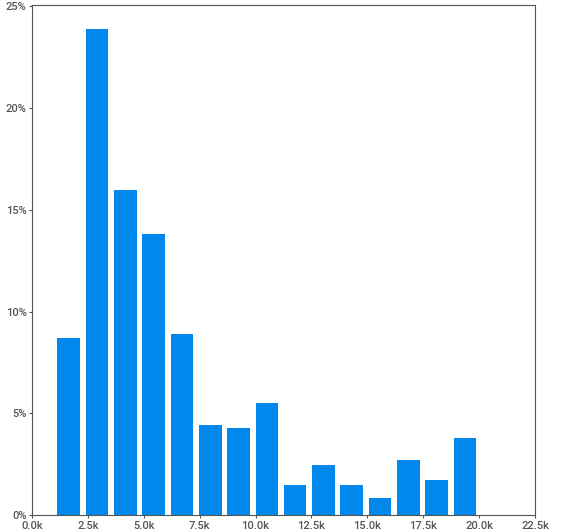
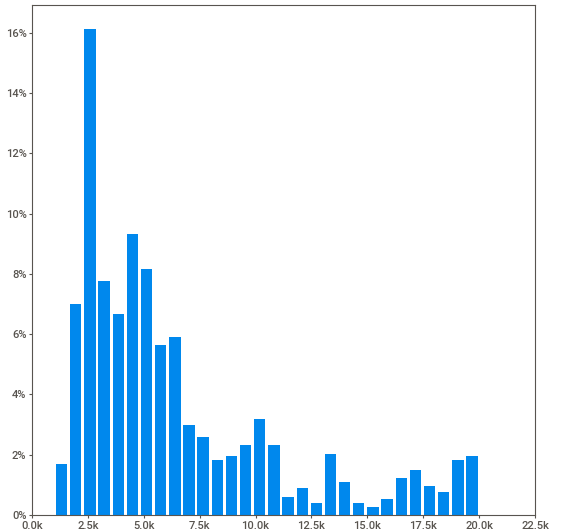
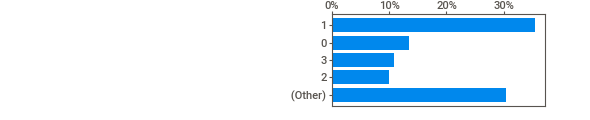
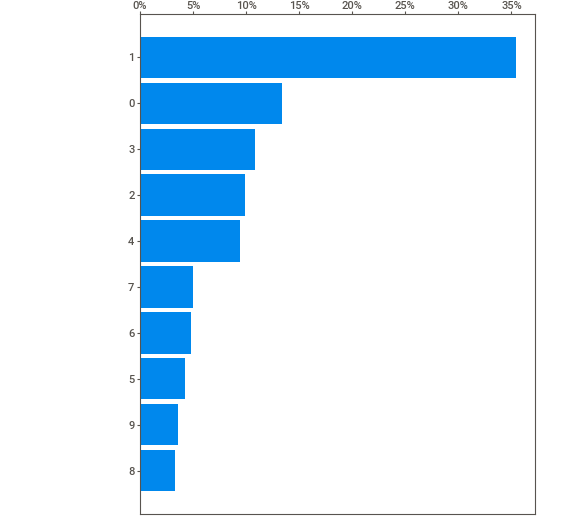
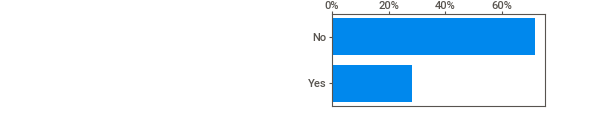
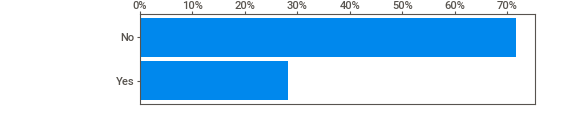
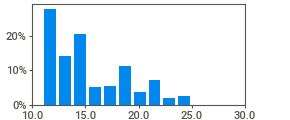
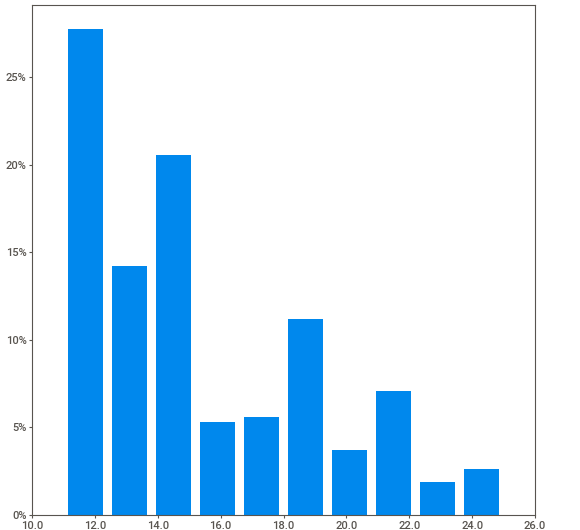
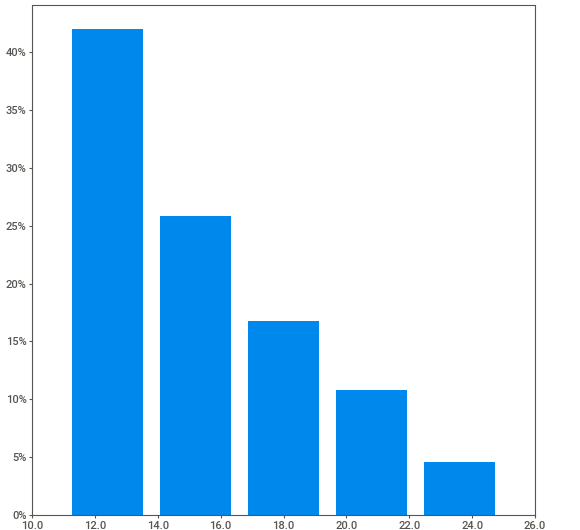
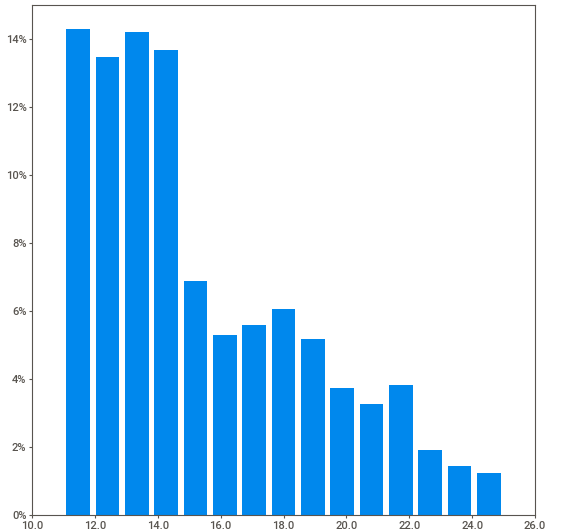
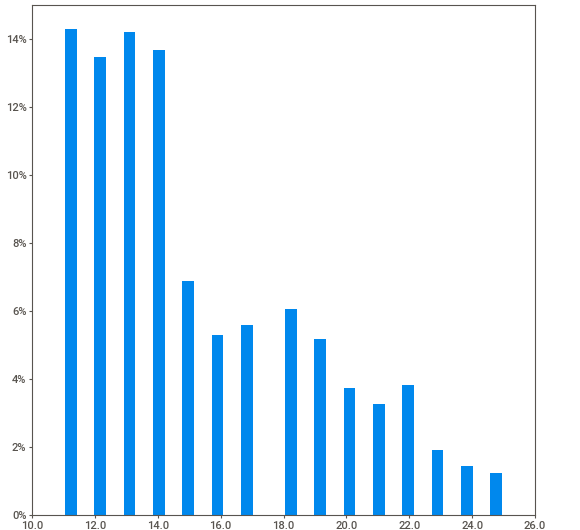
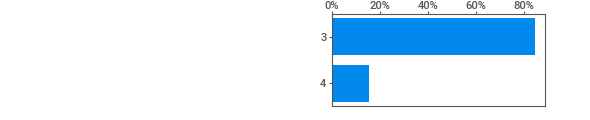
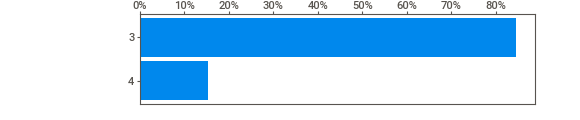
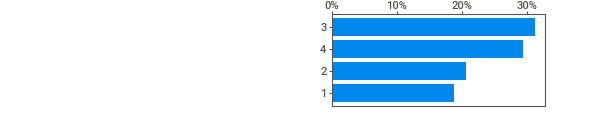
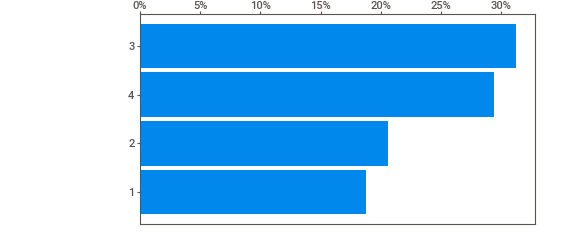
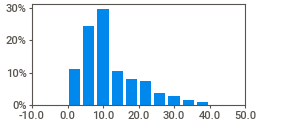
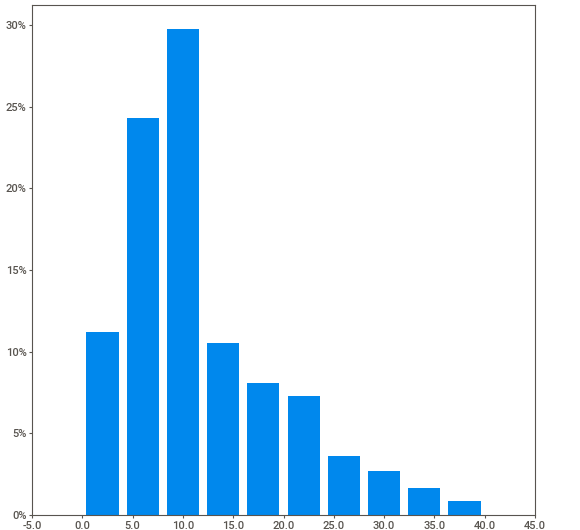
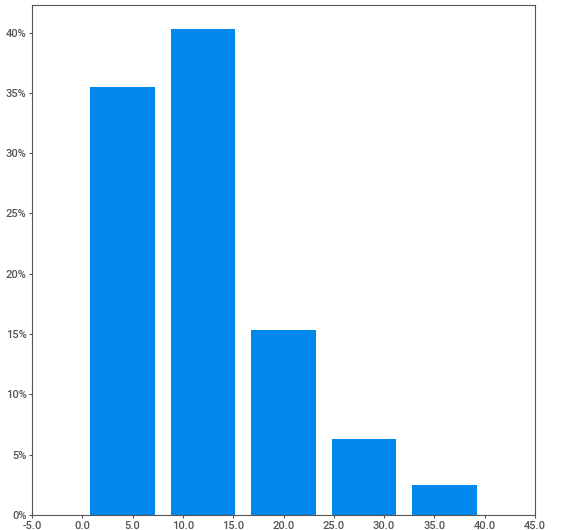
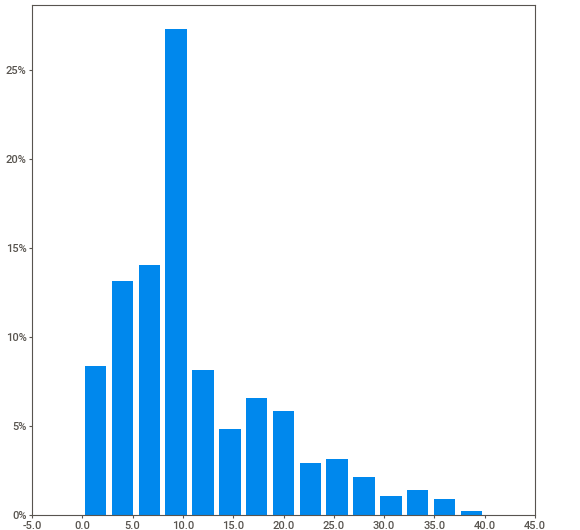
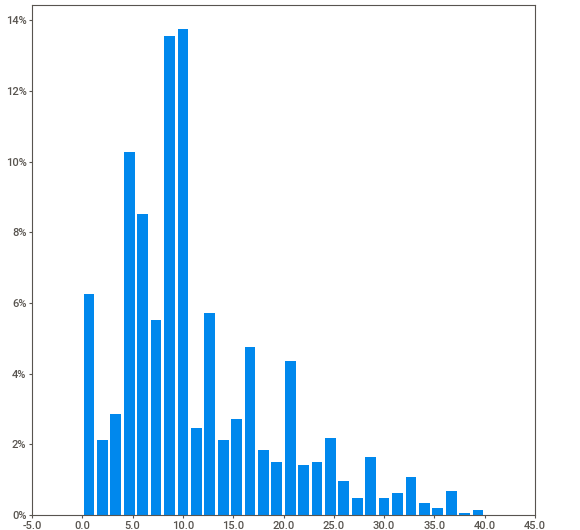
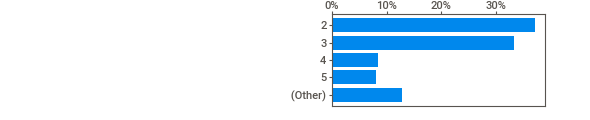
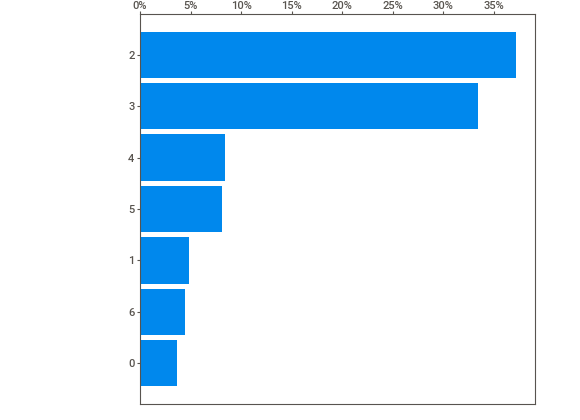
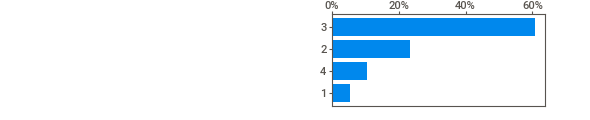
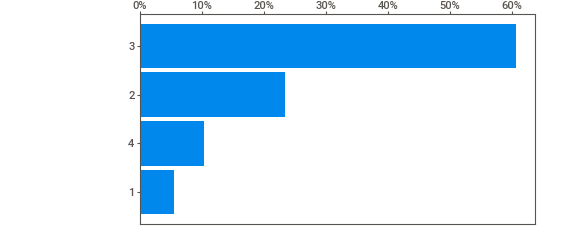
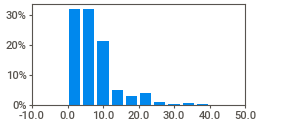
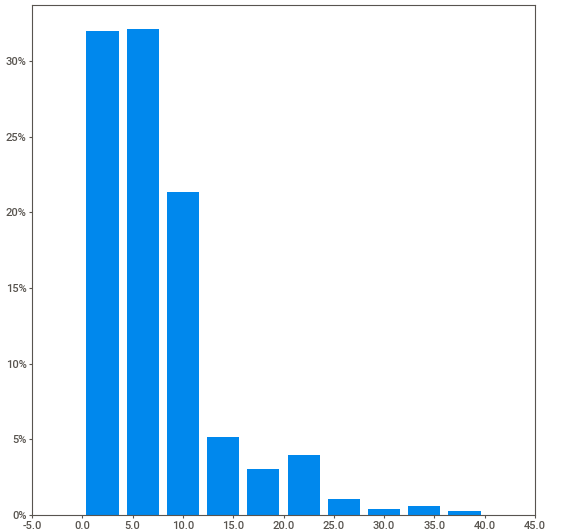
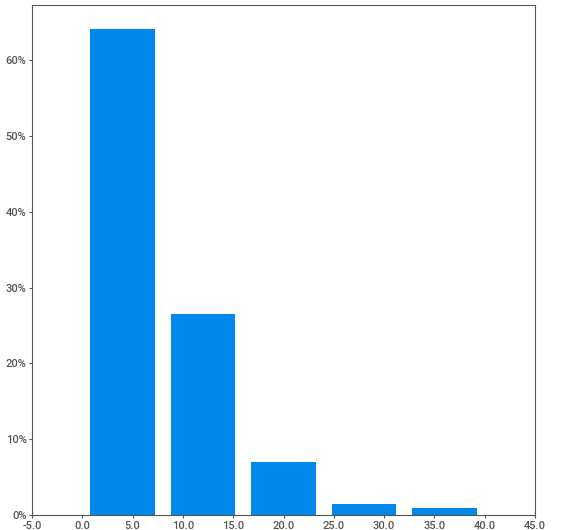
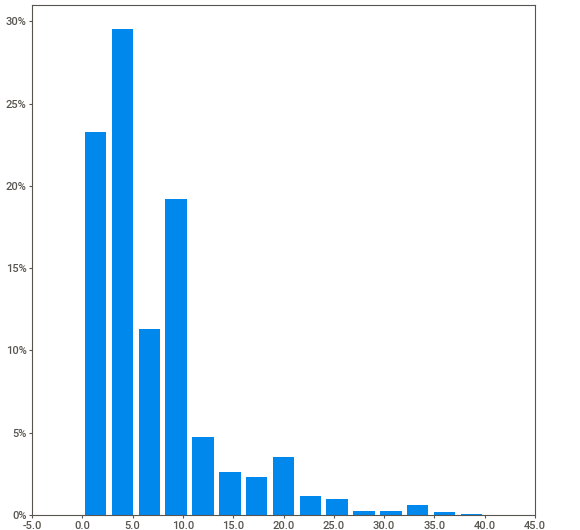
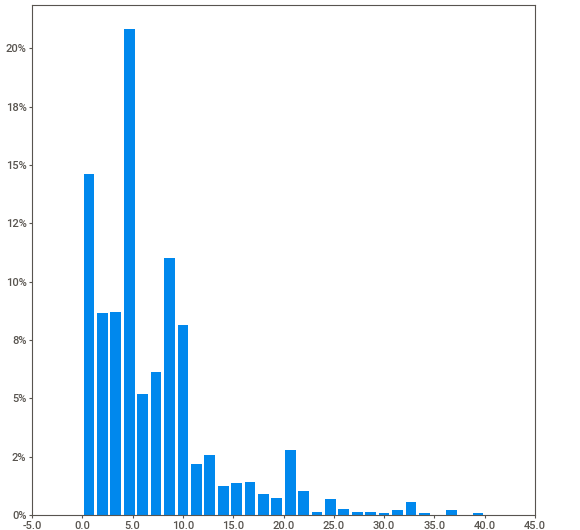
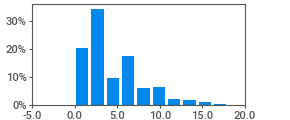
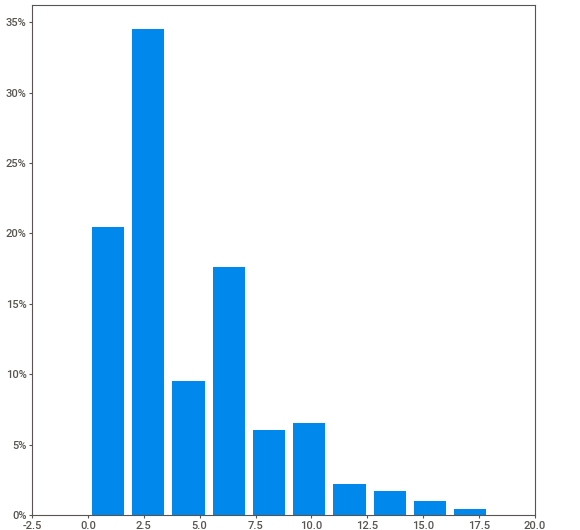
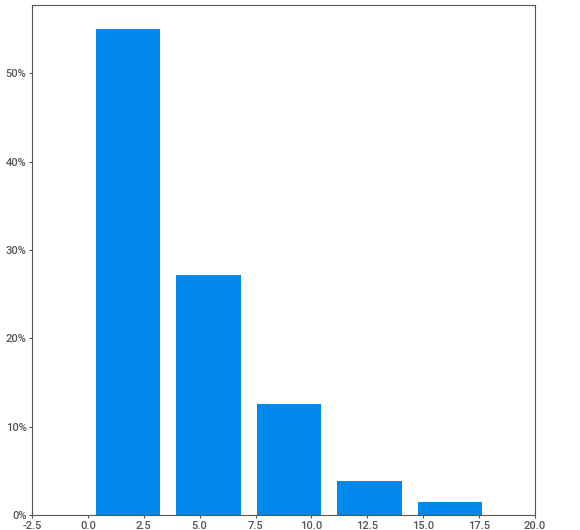
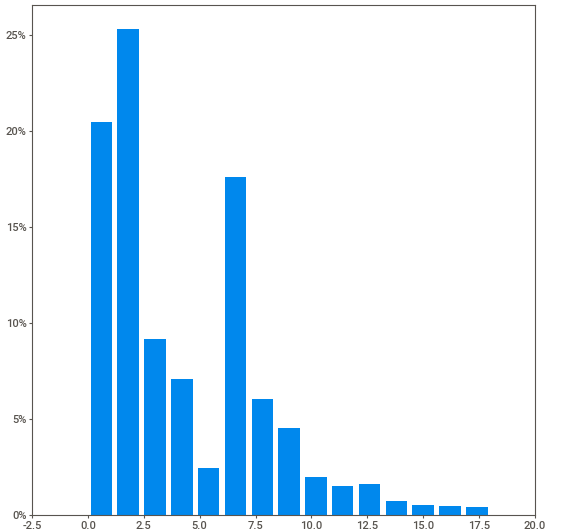
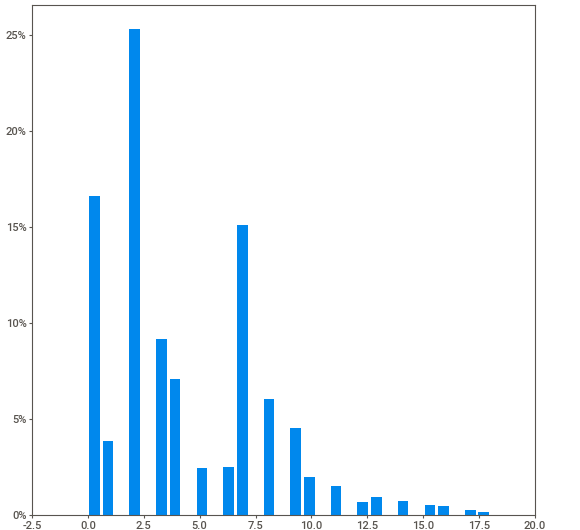
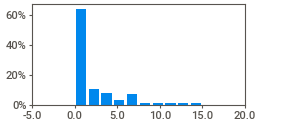
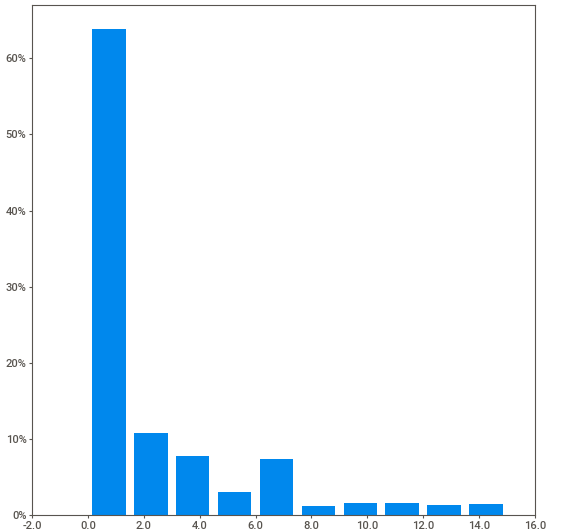
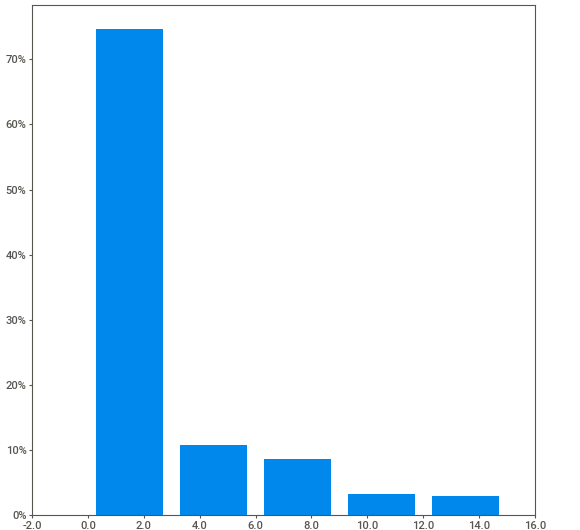
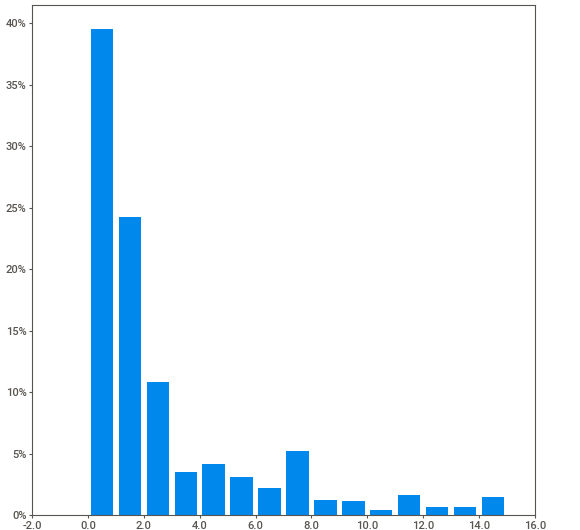
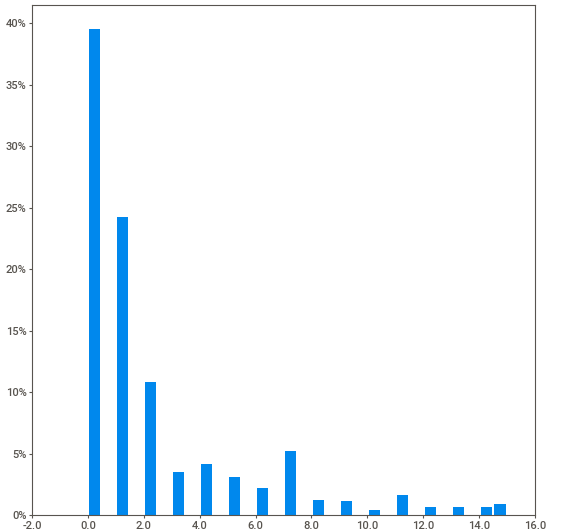
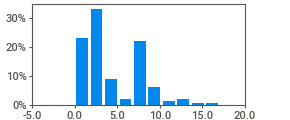
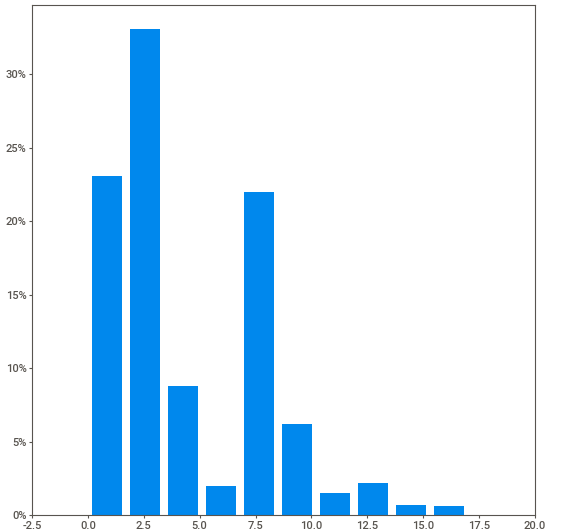
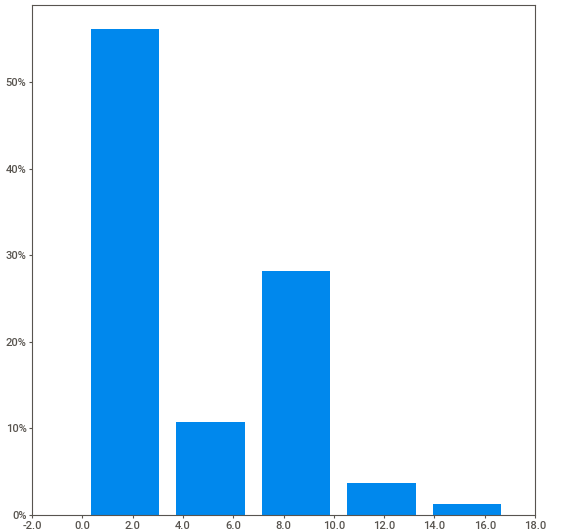
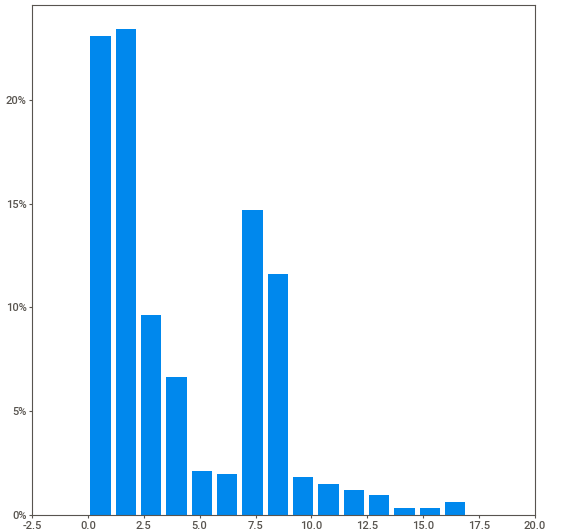
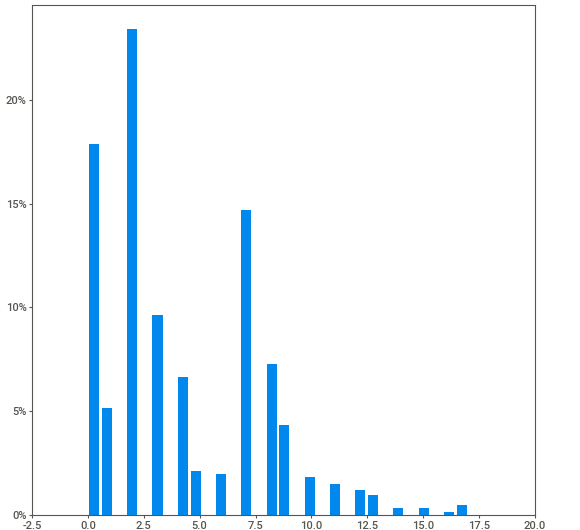
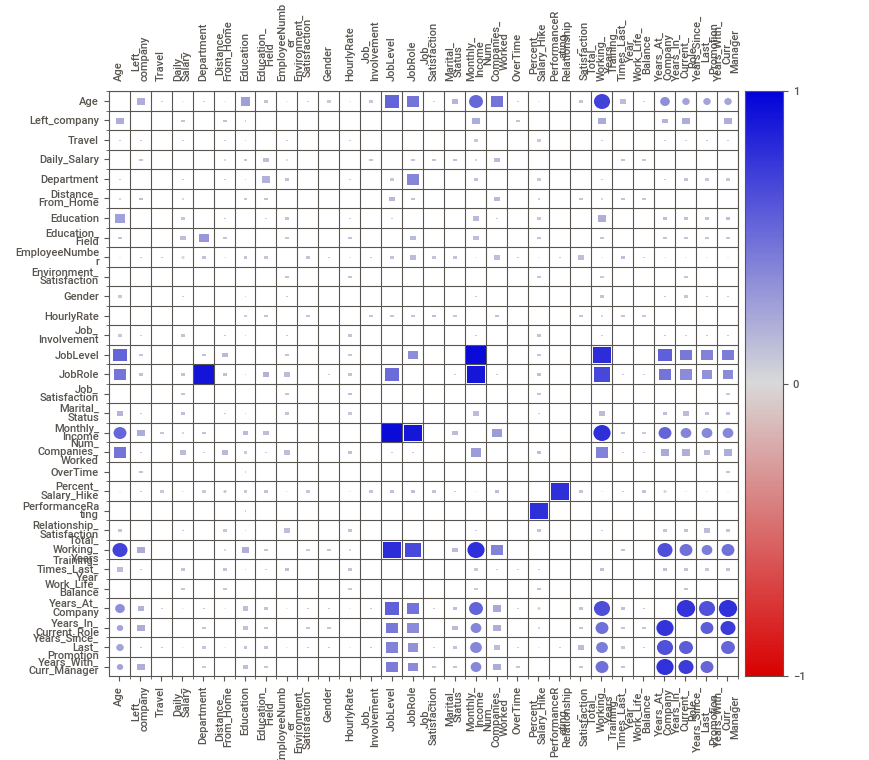
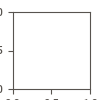

In [192]:
from IPython.core.display import display, HTML
display(HTML('sweetviz_report.html'))

#According to Gender who left_company in pecentage matrix compare bar chart

In [195]:
# Count of males and females who left and stayed
gender_counts = df.groupby(['Gender', 'Left_company']).size().unstack(fill_value=0)
gender_counts

Left_company    0    1
Gender                
Female        501   87
Male          732  150

In [199]:
# Calculate percentages
gender_percentage = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
gender_percentage

Left_company          0          1
Gender                            
Female        85.204082  14.795918
Male          82.993197  17.006803

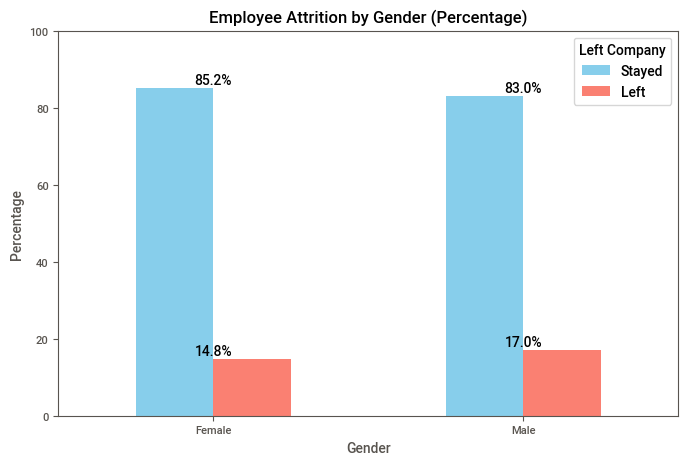

In [198]:
# Create a grouped bar plot
plt.figure(figsize=(8, 5))
gender_percentage.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], ax=plt.gca())

# Adding percentage labels on the bars
for i in range(gender_percentage.shape[0]):
    for j in range(gender_percentage.shape[1]):
        plt.text(i, gender_percentage.iloc[i, j] + 1, f"{gender_percentage.iloc[i, j]:.1f}%", ha='center')

plt.title('Employee Attrition by Gender (Percentage)')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Left Company', labels=['Stayed', 'Left'])
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()

In [171]:
df.columns

Index(['Age', 'Left_company', 'Travel', 'Daily_Salary', 'Department',
       'Distance_From_Home', 'Education', 'Education_Field', 'EmployeeNumber',
       'Environment_Satisfaction', 'Gender', 'HourlyRate', 'Job_Involvement',
       'JobLevel', 'JobRole', 'Job_Satisfaction', 'Marital_Status',
       'Monthly_Income', 'Num_Companies_Worked', 'OverTime',
       'Percent_Salary_Hike', 'PerformanceRating', 'Relationship_Satisfaction',
       'Total_Working_Years', 'Training_Times_Last_Year', 'Work_Life_Balance',
       'Years_At_Company', 'Years_In_Current_Role',
       'Years_Since_Last_Promotion', 'Years_With_Curr_Manager'],
      dtype='object')

#Does distance from home affect on Employee to left company
-we have to categories distance in different bins.\
-Then find the % of people left job due to distance.


In [201]:
# Create distance categories
bins = [0, 5, 10, 15, 20, 25, 30, 35]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']
df['Distance_Category'] = pd.cut(df['Distance_From_Home'], bins=bins, labels=labels, right=False)

In [204]:
# Calculate counts and percentages
distance_counts = df.groupby(['Distance_Category', 'Left_company']).size().unstack(fill_value=0)
distance_percentage = distance_counts.div(distance_counts.sum(axis=1), axis=0) * 100

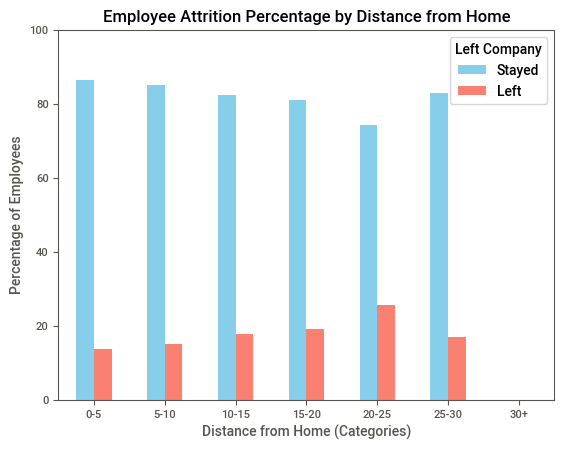

In [205]:
# Create a bar plot for percentages
distance_percentage.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Employee Attrition Percentage by Distance from Home')
plt.xlabel('Distance from Home (Categories)')
plt.ylabel('Percentage of Employees')
plt.xticks(rotation=0)
plt.legend(title='Left Company', labels=['Stayed', 'Left'])
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.show()


##***CONCLUSION on HR Data Analysis***
1- A significant number of employees left the company, with notable patterns observed in demographics like age, distance from home, and job satisfaction.\
2:Gender Differences: Analysis showed differences in attrition rates between male and female employees, suggesting targeted retention strategies could be beneficial.\
3:Job Satisfaction and Involvement: Higher job satisfaction correlated with lower turnover rates. Employees with higher job involvement tended to remain with the company longer.\
4:Environmental Satisfaction: Employees who rated their work environment positively were less likely to leave, indicating that workplace culture plays a crucial role in retention.\
5:-Compensation Influence: Monthly salary had a direct impact on employee retention. Higher salaries were associated with lower attrition rates, emphasizing the importance of competitive pay.\
6:-Balancing Act: Employees who reported better work-life balance were generally more loyal, suggesting that flexible work arrangements or support programs could help reduce turnover.\
7:-Distance from home influenced employee attrition, with longer commutes leading to higher turnover rates. Companies might consider remote work options or relocation assistance to address this issue.\

8:-The analysis reveals critical areas for improvement in employee retention strategies. By focusing on job satisfaction, work-life balance, and competitive compensation, the organization can enhance employee loyalty and reduce turnover rates.